<table style="width:100%;">
    <tr>
        <td style="width:80%; text-align:left; vertical-align: center;">
            <img src="./Images/DoNotRemove.svg" alt="ETH logo" align="left" vspace="4">
        </td>
        <td style="width:20%; text-align:left; vertical-align: top;">
            Institute of Fluid Dynamics<br/>
            Prof. Dr. O. Supponen<br/>
        <img src="./Images/DoNotRemove2.jpg" alt="ETH logo2" align="left" vspace="4">
        </td>
    </tr>
</table>

<center> 
    <h1>Hydrodynamics and Cavitation: Numerical Assignments</h1>
    <h3>by Eduard Meier</h3>
</center>

<center> 
<img src="./Images/DoNotRemove3.png" alt="Cavitation" style="width: 700px;"/>
</center> 

This Jupyter Notebooks contains all code (main script and exercise functions) used to solve the numerical assignments in the course "Hydrodynamics and Cavitation", held by Prof. Supponen in the autumn semester 2022.

Remark: All coding was done on a MacBook and I cannot guarantee that everything runs smoothly on a Windows computer (e.g. delimiters are different)... You also need to have installed all libraries that are imported below:

In [1]:
# Import libraries and other preliminaries
import numpy as np                            # Import numerical python library
from scipy.special import gamma, factorial    # Import gamma function and factorial function from scipy
from scipy.integrate import solve_ivp         # Import solver for (system of coupled) ODEs
from scipy.signal import argrelextrema        # Import function to find local minima/maxima
import scipy.interpolate as interp            # Import function to interpolate
import matplotlib as mpl                      # Import python mathematical plotting library
import matplotlib.pyplot as plt               # Import python mathematical plotting library
import xlrd                                   # Import data from excel file (necessary for assignment 9)

# Use LaTeX font in plots:
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': ['Computern Modern Roman'],
})


## Assignment 1

Given the potential $\phi(r,\theta) = -u(t)a^2 \frac{\cos{\theta}}{r}$, plot the contours of the radial $U_r = \frac{\partial \phi}{\partial r}$ and tangential $U_\theta = \frac{1}{r}\frac{\partial \phi}{\partial \theta}$ velocity components. Plot also contours of the velocity magnitude $|\mathbf{U}|$.

First, we calculate the partial derivatives:
\begin{align} 
U_r &= \frac{\partial}{\partial r} \left( -u(t) a^2 \frac{\cos{\theta}}{r} \right)   \\
    &= u(t)a^2 \frac{\cos{\theta}}{r^2} \; \; \;
\end{align}

\begin{align} 
U_\theta &= \frac{1}{r} \frac{\partial}{\partial \theta} \left( -u(t) a^2 \frac{\cos{\theta}}{r} \right)   \\
    &= u(t)a^2 \frac{\sin{\theta}}{r^2}
\end{align}

The total 2D velocity vector is given by $\mathbf{U} = [U_r, U_\theta]^\intercal$.

To compute above velocity components starting from cartesian coordinate arrays, it is required to convert cartesian coordinate to polar coordinates, which is done via the following relations:

\begin{align}
    r &= \sqrt{x^2 + y^2} \\
    \theta &= \arctan{\frac{y}{x}}
\end{align}

As no numerical values were given in the assignment, the plotting assumes (for simplicity) values of $a = 1$ m for the radius of the cylinder and $u(t) = u_0 = 1$ m s$^{-1}$ for the moving speed of the cylinder.


In [2]:
def plot_ass1():
    """
    Plot contours of radial and tangential velocity components as well as velocity magnitude
    """

    # Define parameters
    a = 1  # Cylinder diameter [m]
    u = 1  # Cylinder moving speed [m/s]

    # Range of 2D cartesian coordinates (w/o cylinder)
    # Create an array of 2*1000 linearly spaced elements between -2 and 2 
    x = np.linspace(-2, 2, 1000) # Create coordinate array in x-direction
    y = np.linspace(-2, 2, 1000) # Create coordinate array in y-direction
    
    # Create meshgrid in cartesian coordinates
    xx, yy = np.meshgrid(x, y)  # Create meshgrid from x & y coordinate arrays
        
    # Convert meshgrid to polar coordinates
    rr = np.sqrt(xx**2 + yy**2)       # Conversion for r = sqrt(x^2 + y^2) (element-wise operations)
    thetatheta = np.arctan2(yy, xx)   # Conversion for theta = arctan(y / x) (element-wise operations)
    
    # Find indices of array elements inside cylinder
    rcyl = np.where(rr < a)     # Save indices of elements inside cylinder (i.e. r < a)
            
    # Calculate components of U and its magnitude via equations above 
    Ur =     u * a**2 * np.cos(thetatheta) / rr**2  # Calculate radial velocity component
    Utheta = u * a**2 * np.sin(thetatheta) / rr**2  # Calculate tangential velocity component
    Uabs = np.sqrt(Ur**2 + Utheta**2)               # Calculate the velocity magnitude
    
    # Remove singularity inside cylinder (where r->0)
    Ur[rcyl] = 0        # Remove values inside cylinder for radial velocity component
    Utheta[rcyl] = 0    # Remove values inside cylinder for tangential velocity component
    Uabs[rcyl] = 0      # Remove values inside cylinder for the velocity magnitude
    # Create circle (representing the cylinder cross-section)
    circle1 = plt.Circle((0, 0), radius=a, color='k') # Create circle for radial velocity diagram
    circle2 = plt.Circle((0, 0), radius=a, color='k') # Create circle for tangential velocity diagram
    circle3 = plt.Circle((0, 0), radius=a, color='k') # Create circle for velocity magnitude diagram
        
    # Create plots
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (6,15)) # Create figure with three subplots in one column
    plot1 = axs[0].contourf(xx, yy, Ur)       # Create contour plot of radial velocity component
    plot2 = axs[1].contourf(xx, yy, Utheta)   # Create contour plot of tangential velocity component
    plot3 = axs[2].contourf(xx, yy, Uabs)     # Create contour plot of velocity magnitude
    axs[0].add_patch(circle1)                 # Add circle to plot1
    axs[1].add_patch(circle2)                 # Add circle to plot2
    axs[2].add_patch(circle3)                 # Add circle to plot3
    
    # Add colorbars
    cbar1 = fig.colorbar(plot1, ax = axs[0])  # Add colorbar to plot1
    cbar2 = fig.colorbar(plot2, ax = axs[1])  # Add colorbar to plot2
    cbar3 = fig.colorbar(plot3, ax = axs[2])  # Add colorbar to plot3
    
    # Axis labels
    axs[0].set_xlabel('x [m]')  # Add x-axis label to plot1
    axs[0].set_ylabel('y [m]')  # Add y-axis label to plot1
    axs[1].set_xlabel('x [m]')  # Add x-axis label to plot2
    axs[1].set_ylabel('y [m]')  # Add y-axis label to plot2
    axs[2].set_xlabel('x [m]')  # Add x-axis label to plot3
    axs[2].set_ylabel('y [m]')  # Add y-axis label to plot3
    cbar1.set_label(r'$U_r$ [m s$^{-1}$]', rotation=270, fontsize=14, labelpad=20)  # Set colorbar label for plot1
    cbar2.set_label(r'$U_\theta$ [m s$^{-1}$]', rotation=270, fontsize=14, labelpad=20) # " for plot2
    cbar3.set_label(r'$|U|$ [m s$^{-1}$]', rotation=270, fontsize=14, labelpad=25)      # " for plot3

    # Title
    fig.suptitle('Assignment 1', fontsize=16, y=0.91)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass1.pdf', bbox_inches='tight') 

## Assignment 2

<center> 
<img src="./Images/DoNotRemove4.jpg" alt="Schematics" style="width: 800px;"/>
</center> 

The two radii of curvature, $R_1$ and $R_2$ are indicated in above sketch of the considered system. It is assumed that $h \ll R$ and thus $R_1 \ll R_2$. From the general Young-Laplace equation 
\begin{equation}
\Delta P = \gamma \left( \frac{1}{R_1} + \frac{1}{R_2} \right) \sim \frac{\gamma}{R_1} \text{ for }R_2 \text{ large}
\end{equation}

it follows that high curvature (i.e. low radii of curvature) dominate the resulting pressure difference, and thus only $R_1$ is considered in the following. As the meniscus is concave, we have a negative radius of curvature $R_1$, which (according to above sketch) is calculated via

\begin{align}
R_1 &= - \frac{h}{2\cos{\alpha}} \\
    &= - \frac{V}{2R^2\pi\cos{\alpha}}
\end{align}

where in a second step the height was substituted, making use of $V = A \cdot h = R^2 \pi \cdot h$, which approximates the liquid by a cylindrical body (reasonable as $R_1$ is small).

From above relations, the required force to counteract capillarity can be calculated via:

\begin{equation}
F = - \Delta P \cdot A_{\text{wet}} = \frac{4R^2\pi\gamma\cos{\alpha}}{h} = \frac{4R^4\pi^2\gamma\cos{\alpha}}{V}
\end{equation}

In [3]:
def plot_ass2():
    """
    Plot F vs. h for alpha = pi/4 and F vs. alpha for h = 1 mm
    """
    
    # Define parameters
    gamma = 72e-3      # Surface tension [N/m]
    R = 10e-2          # Plate radius [m]
    h2 = 1e-3          # Liquid height [m] for 2nd plot
    alpha1 = np.pi/4   # Contact angle [rad] for 1st plot
    
    # Range of "independent" variable (h or alpha)
    # Create arrays of 1000 linearly spaced elements
    h1 = np.linspace(1e-6, 1e-3, 1000)       # Create array of liquid heights [m] for 1st plot
    alpha2 = np. linspace(0, 2*np.pi, 1000)  # Create array of contact angles [rad] for 2nd plot
    
    # Calculate forces for both plots
    F1 = 4 * R**2 * np.pi * np.cos(alpha1) / h1  # Calculate force for 1st plot
    F2 = 4 * R**2 * np.pi * np.cos(alpha2) / h2  # Calculate force for 1st plot
    
    # Create plots
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (6,15)) # Create figure with two subplots in one column
    plt.subplots_adjust(hspace=0.35) # Increase height (vspace) between figures
    
    plot1 = axs[0].loglog(h1, F1)     # Create loglog plot of force vs. h
    #plot1 = axs[0].plot(h1, F1)        # Create plot of force vs. h
    plot2 = axs[1].plot(alpha2, F2)    # Create plot of force vs. alpha
    
    # Axis labels
    axs[0].set_xlabel('h [m]')  # Add x-axis label to plot1
    axs[0].set_ylabel('F [N]')  # Add y-axis label to plot1
    axs[1].set_xlabel(r'$\alpha$ [rad]')  # Add x-axis label to plot2
    axs[1].set_ylabel('F [N]')  # Add y-axis label to plot2

    axs[1].set_xticks(np.arange(0, 2*np.pi+0.01, np.pi/4))           # Set x tick values
    labels = ['$0$', r'$\pi/4$', r'$\pi/2$', r'$3\pi/4$', r'$\pi$',  # Define x tick labels
          r'$5\pi/4$', r'$3\pi/2$', r'$7\pi/4$', r'$2\pi$']          # Set x tick labels
    axs[1].set_xticklabels(labels)
    
    # Comments/Interpretations on plots
    t1 = ("The apparent power-law behavior leads to very high forces required at microscopic liquid heights.")
    axs[0].text(3*1e-5, 1e1, t1, ha='center', wrap=True)    # Add text to plot1
    t2 = (r"Wetting liquids (i.e. $\alpha < \pi/2$): the plates need to be pushed together (positive force)" "\n" \
          r"Non-wetting liquids (i.e. $\alpha > \pi/2$): the plates stick together (negative force).")
    axs[1].text(np.pi, -210, t2, ha='center', wrap=True) # Add text to plot2

    # Title
    fig.suptitle('Assignment 2', fontsize=16, y=0.91)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass2.pdf', bbox_inches='tight') 

# Assignment 3

<center> 
<img src="./Images/DoNotRemove5.jpg" alt="Schematics" style="width: 700px;"/>
</center> 

In [4]:
def plot_ass3():
    """
    Plot wave speed of surface waves versus distance
    """
    
    # Define parameters / variables / constants
    lamb = 35              # Wavelength [m]
    k = 2*np.pi/lamb       # Wavenumber [1/m]
    a = 0.5/2              # Wave height (as defined in lecture notes) [m]
    theta = 2 * np.pi/360  # Seabed slope [rad]
    dmax = 500             # Seabed length [m]
    gamma = 0.07275        # Surface tension of water at 20 deg C [N/m]
    g = 9.81               # Gravitational acceleration [m/s^2]
    rho = 997              # Water density at 25 deg C [kg/m^3]
    
    # Range of "independent" variable
    # Create arrays of 1000 linearly spaced elements
    d = np.linspace(0, 500, 1000)            # Create array of distance values [m] for plot

    # Preliminary calculations
    hmax = np.tan(theta) * dmax                                 # Calculate maximal seabed height [m]
    hbed = hmax * (1 - d/dmax)                                  # Calculate array of seabed heights [m]
    h = hmax - hbed                                             # Calculate water depth [m]
                                                                # Note that hbed corresponds to y in the sketch
                                                                # and hmax corresponds to h in the sketch
    eta = hmax + a*np.cos(2*np.pi/lamb * d)                     # Sea wave elevation [m] at t = 0
    hbreak = np.arctanh(2*a*k/0.89)/k                           # Wave break height [m]
    dbreak = hbreak * dmax / hmax                               # Wave break distance [m]
                                                                # Found by inverting function for h above
    dtrans = dmax / k / hmax                                    # Transition distance [m], where h = 1/k
    itrans = np.where(d >= dtrans)[0]                           # Create array: only 1s where cond is met
    dsw = d[0:itrans[0]]                                        # Shallow water distance [m]
    ddw = d[itrans[1]:-1]                                       # Deep water distance [m]
    
    c = np.sqrt(g/k * np.tanh(k*h) * (1 + gamma*k**2/rho/g))                   # Wave phase velocity [m/s]
    cdw = np.sqrt(np.ones(len(ddw)) * g/k * (1 + k**2*np.sqrt(gamma/rho/g)))   # Deep water wave velocity [m/s]
    csw = np.sqrt(g*h[0:itrans[0]])                                            # Shallow water wave velocity [m/s]
    
    # Create plots
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (10,5)) # Create figure with one plot
    plot = axs.plot(d, hbed, color='tab:brown', alpha=0.5)      # Create plot of h vs. d
    plot2 = axs.plot(d, eta, color='b', alpha=0.7)              # Create plot of eta vs. d
    
    plt.yticks([hmax, hmax-2, hmax-4, hmax-6, hmax-8], np.arange(0, 10, 2))  # Set label locations.
    
    axs2 = axs.twinx()
    plot3 = axs2.plot(d, c, color='r', alpha=0.7)                  # Create plot of c vs. d
    plot4 = axs2.plot(ddw, cdw, '--', color='r', alpha=0.7)        # Create plot of cdw vs. d
    plot5 = axs2.plot(dsw, csw, '--', color='r', alpha=0.7)        # Create plot of csw vs. d

    axs.vlines(dbreak, 0, hmax-hbreak, linestyles='dashed') # Vertical dashed line at break distance
    axs.vlines(dtrans, 0, hmax-1/k, linestyles='dashed')    # Vertical dashed line at shallow-deep transition
    
    axs.set_xlabel('d [m]')  # Add x-axis label to plot
    axs.set_ylabel('h [m]')  # Add y-axis label to plot
    axs2.set_ylabel('v [m s$^{-1}$]', color='r')  # Add 2nd y-axis label to plot

    # Shade area under plot
    def eta(d):
        return hmax + a*np.cos(2*np.pi/lamb * d)
    
    # Define where to shade
    axs.fill_between(x= d, 
                    y1= eta(d), 
                    where= (0 < d)&(d < dmax),
                    color= "b",
                    alpha= 0.2)   
    
    axs.fill_between([0, dmax], [hmax, 0], color='tab:brown', alpha=1) # Shade area under seafloor  
    
    # Comments/Interpretations on plots
    t1 = ("$\longleftarrow$ Wave breaks")
    axs.text(dbreak+5, hmax-hbreak, t1, ha='left', wrap=True)    # Add text to plot
    t2 = ("$\longleftarrow$ Shallow-deep water transition")
    axs.text(dtrans+5, hmax-1/k, t2, ha='left', wrap=True)    # Add second text to plot
    t3 = ("True wave speed, $c$")
    axs.text(dtrans, hmax-1/k+4, t3, ha='center', wrap=True, color='r')    # Add third text to plot
    t4 = ("Shallow water, $c_{\mathrm{sw}}$$\longleftarrow$")
    axs.text(dtrans-5, hmax-1/k-2, t4, ha='right', wrap=False, color='r')    # Add fourth text to plot
    t5 = ("$\longrightarrow$ Deep water, $c_{\mathrm{dw}}$")
    axs.text(dtrans+5, hmax-1/k-2, t5, ha='left', wrap=False, color='r')    # Add fifth text to plot

    # Title
    fig.suptitle('Assignment 3', fontsize=16, y=0.95)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass3.pdf', bbox_inches='tight') 

# Assignment 4

The dispersion relation for two incompressible, inviscid fluids (one laying above the other) in a uniform gravitational field, including surface tension effects reads

\begin{align}
\omega &= \frac{k(\rho_1 u_1 + \rho_2 u_2)}{\rho_1 + \rho_2} \pm \frac{k}{\sqrt{\rho_1 + \rho_2}} \sqrt{\alpha (k)} \\[5pt]
\mathrm{where} \;\;\; \alpha (k) &= \frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1} + \frac{(\rho_1 - \rho_2)g}{k} + \gamma k \; ,
\end{align}

In [5]:
def alpha(rho, deltau, gamma, k):
    """
    Function to calculate and return alpha(k)
    Remarks: 1) rho1 = rho[0], rho2 = rho[1]
             2) k is a vector -> use np.divide/np.multiply for elementwise operations
    """
    alpha = np.zeros(len(k))    # Initialize alpha
    
    # Calculate alpha based on given input parameters (term-by-term)
    term1 = np.ones(len(k)) * -1 * (rho[0]*rho[1]*(deltau)**2)/(rho[1]+rho[0]) 
    term2 = (rho[0]-rho[1])*g / k
    term3 = gamma * k
    alpha = term1 + term2 + term3
    
    return term1, term2, term3, alpha

which is in the following used in combination with a normalized wavenumber $kl_{\mathrm{cap}}$ (normalized by multiplication with the capillary length $l_{\mathrm{cap}}$) with 

\begin{equation}
l_{\mathrm{cap}} = \sqrt{\frac{\gamma}{|\rho_1 - \rho_2|g}}
\end{equation}

In [6]:
def lc(gamma, rho):
    """
    Function to calculate and return the capillary length
    """
    global g 
        
    # Calculate lc based on given input parameters
    lc = np.sqrt(gamma/(np.abs(rho[0]-rho[1])*g))
                 
    return lc

For a stability analysis, the derivative $\mathrm{d}\alpha/\mathrm{d}k$ is set to zero:

\begin{align}
\frac{\mathrm{d}\alpha}{\mathrm{d}k} &= - \frac{(\rho_1 - \rho_2)g}{k^2} + \gamma \stackrel{!}{=} 0 \\[5pt]
\implies k_{\mathrm{crit}} &= \sqrt{\frac{(\rho_1 - \rho_2)g}{\gamma}} \\[5pt]
\lambda_{\mathrm{crit}} &= \frac{2 \pi} {\sqrt{\frac{(\rho_1 - \rho_2)g}{\gamma}}} \\[5pt]
\end{align}

And thus the corresponding critical velocity difference is found via the following manipulations 

\begin{align}
\alpha(k) = \frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1} + \frac{(\rho_1 - \rho_2)g}{k_{\mathrm{crit}}} + \gamma k_{\mathrm{crit}} \stackrel{!}{=} 0 \\[5pt]
 \frac{\rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1} = \frac{(\rho_1 - \rho_2)g}{k_{\mathrm{crit}}} + \gamma k_{\mathrm{crit}}  \\[5pt]
(u_1 - u_2)_{\mathrm{crit}} = \sqrt{\frac{(\rho_1^2 - \rho_2^2)g}{k_{\mathrm{crit}}\rho_1\rho_2} + \frac{(\rho_2+\rho_1)\gamma k_{\mathrm{crit}}}{\rho_1\rho_2}}
\end{align}

In [7]:
def critval(rho, gamma):
    """
    Function to calculate and return the critical parameter values for a given system char. by rho and gamma
    """
    global g
    
    # Calculate k_crit
    kcrit = np.sqrt((rho[0]-rho[1])*g/gamma)
    
    # Calculate lambda_crit
    lamcrit = 2*np.pi/kcrit
    
    # Calculate (u_1 - u_2)_crit
    deltaucrit = np.sqrt((rho[0]**2-rho[1]**2)*g/(kcrit*rho[0]*rho[1]) + (rho[1]+rho[0])*gamma*kcrit/rho[0]/rho[1])
    
    return deltaucrit, kcrit, lamcrit

In [8]:
def plot_ass4():
    """
    Plot alpha as function of k
    Remark: The number ending the variable names indicates the task number inside the assignment e.g. rho_12[1] ->          
    rho for task 1 and 2, rho_3 -> rho for task 3
    """
    # Define parameters / variables / constants
    global g
    
    g = 9.81                     # Gravitational acceleration [m/s^2]
        
    rho_12 = np.zeros(2)        # Initialize density array (including density 1 & 2) for tasks 1) and 2)
    rho_3 = np.zeros(2)         # Initialize density array (including density 1 & 2) for task 3)
    
    rho_12[0] = 1.2              # Density fluid 1 (= index 0) (on bottom) [kg/m^3]    
    rho_12[1] = 1e3              # Density fluid 2 (= index 1) (on top) [kg/m^3]
    rho_3[0] = rho_12[1]         # Inverted densities for task 3
    rho_3[1] = rho_12[0]         # Inverted densities for task 3
    
    gamma = 72e-3                # Surface tension [N /m]
    
    deltau_1a = 11              # Velocity difference (u1-u2) for task 1a) [m s^-1]
    deltau_1b = 5               # Velocity difference (u1-u2) for task 1b) [m s^-1]
    deltau_2 = 0                # Velocity difference (u1-u2) for task 2) [m s^-1]
    deltau_3a = deltau_2        # Velocity difference (u1-u2) for task 3a) [m s^-1]
    
    
    # Calculate (u_1 - u_2)_crit, k_crit and lambda_crit
    deltaucrit_3b, kcrit_3b, lamcrit_3b = critval(rho_3, gamma)
    deltau_3b1 = deltaucrit_3b - 1  
    deltau_3b2 = deltaucrit_3b + 1
    
    # Define given interval for klc and calculate the corresponding wave number vectors k
    klc = np.linspace(1e-6, 5, 1000)
        
    k_12 = klc / lc(gamma, rho_12)     # Calculate wave number vector for tasks 1) and 2)
    k_3 = klc / lc(gamma, rho_3)       # Calculate wave number vector for task 3)
    
    # Calculate alpha terms (a1, a2, a3) and total alpha for respective tasks
    a1_1a, a2_1a, a3_1a, alpha_1a = alpha(rho_12, deltau_1a, gamma, k_12)
    a1_1b, a2_1b, a3_1b, alpha_1b = alpha(rho_12, deltau_1b, gamma, k_12)
    a1_2, a2_2, a3_2, alpha_2 = alpha(rho_12, deltau_2, gamma, k_12)
    a1_3a, a2_3a, a3_3a, alpha_3a = alpha(rho_3, deltau_3a, gamma, k_3)
    a1_3b1, a2_3b1, a3_3b1, alpha_3b1 = alpha(rho_3, deltau_3b1, gamma, k_3)
    a1_3b2, a2_3b2, a3_3b2, alpha_3b2 = alpha(rho_3, deltau_3b2, gamma, k_3)
    
    # Find element index where stability changes
    def find_nearest(array, value):
        idx = (np.abs(array - value)).argmin()
        return idx

    id0_alpha_1a = find_nearest(alpha_1a, 0)    # Index where alpha is closest to 0 (Task 1a)
    id0_alpha_1b = find_nearest(alpha_1b, 0)    # Index where alpha is closest to 0 (Task 1b)
    id0_alpha_2 = find_nearest(alpha_2, 0)      # Index where alpha is closest to 0 (Task 2)
    
    k0_1a = k_12[id0_alpha_1a]                  # Wavenumber value where alpha is closest to 0 (Task 1a)
    k0_1b = k_12[id0_alpha_1b]                  # Wavenumber value where alpha is closest to 0 (Task 1b)
    k0_2 = k_12[id0_alpha_2]                    # Wavenumber value where alpha is closest to 0 (Task 2)
    
    lam0_1a = 2*np.pi/k0_1a                      # Wavelength value where alpha is closest to 0 (Task 1a)
    lam0_1b = 2*np.pi/k0_1b                      # Wavelength value where alpha is closest to 0 (Task 1b)
    lam0_2 = 2*np.pi/k0_2                        # Wavelength value where alpha is closest to 0 (Task 2)
    
    #print('Task 1a: The system is stable for lambda <', 1e3*lam0_1a, 'mm')
    #print('Task 1b: The system is stable for lambda <', 1e3*lam0_1b, 'mm')
    #print('Task 2: The system is stable for lambda <', 1e3*lam0_2, 'mm')
    
    # Create plots
    fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(9, 40)) # Create figure with six subplots
    plt.subplots_adjust(hspace=0.35) # Increase height (vspace) between figures
    
    # Subfigure 1
    
    # Plot curves
    plot1 = axs[0].plot(klc, alpha_1a, color='k', label=r'$\alpha(k)$')     # Create plot of total alpha vs. klc
    plot2 = axs[0].plot(klc, a1_1a, color='k', linestyle='dashed', alpha=0.2, label=r'$\frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1}$')      # Create plot of alpha term 1 vs. klc
    plot3 = axs[0].plot(klc, a2_1a, color='k', linestyle='dotted', alpha=0.2, label=r'$\frac{(\rho_1 - \rho_2)g}{k}$')     # Create plot of alpha term 2 vs. klc
    plot4 = axs[0].plot(klc, a3_1a, color='k', linestyle='dashdot', alpha=0.2, label=r'$\gamma k$')     # Create plot of alpha term 3 vs. klc
    
    # Set legend
    axs[0].legend()
    
    # Set title
    axs[0].set_title('Task 1a: $|u_1 - u_2| = 11$ m/s, stable for $\lambda < 3$ mm \n gravity and velocity terms (dotted, dashed) destabilize, capillarity term stabilizes (dash-dotted) \n')
    
    # Set axes labels
    axs[0].set_xlabel(r'$k l_\mathrm{cap}$ [-]')
    axs[0].set_ylabel('Discriminant of $\omega$')
    
    # Set axes limits
    axs[0].set_xlim([0, 5])
    axs[0].set_ylim([-300, 200])
    
    # Shade area 
    axs[0].fill_between([-2, 7], [200, 200], color='tab:green', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[0].fill_between([-2, 7], [-300, -300], color='tab:red', alpha=0.25, linewidth=0) # Shade area below zero red (unstable)  
    
     # Comments/Interpretations on plots
    t1 = ("stable region")
    axs[0].text(4, 50, t1, ha='left', color='g', wrap=True)    # Add text to plot
    t2 = ("unstable region")
    axs[0].text(4, -100, t2, ha='left', color='r', wrap=True)    # Add text to plot

    # Subfigure 2
    
    # Plot curves
    plot1 = axs[1].plot(klc, alpha_1b, color='k', label=r'$\alpha(k)$')     # Create plot of total alpha vs. klc
    plot2 = axs[1].plot(klc, a1_1b, color='k', linestyle='dashed', alpha=0.2, label=r'$\frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1}$')      # Create plot of alpha term 1 vs. klc
    plot3 = axs[1].plot(klc, a2_1b, color='k', linestyle='dotted', alpha=0.2, label=r'$\frac{(\rho_1 - \rho_2)g}{k}$')     # Create plot of alpha term 2 vs. klc
    plot4 = axs[1].plot(klc, a3_1b, color='k', linestyle='dashdot', alpha=0.2, label=r'$\gamma k$')     # Create plot of alpha term 3 vs. klc

    # Set legend
    axs[1].legend()
    
    # Set title
    axs[1].set_title('Task 1b: $|u_1 - u_2| = 5$ m/s, stable for $\lambda < 10$ mm \n gravity and velocity terms (dotted, dashed) destabilize, capillarity term stabilizes (dash-dotted) \n')
    
    # Set axes labels
    axs[1].set_xlabel(r'$k l_\mathrm{cap}$ [-]')
    axs[1].set_ylabel('Discriminant of $\omega$')
    
    # Set axes limits
    axs[1].set_xlim([0, 5])
    axs[1].set_ylim([-300, 200])
    
    # Shade area 
    axs[1].fill_between([-2, 7], [200, 200], color='tab:green', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[1].fill_between([-2, 7], [-300, -300], color='tab:red', alpha=0.25, linewidth=0) # Shade area below zero red (unstable)
    
    # Comments/Interpretations on plots
    t1 = ("stable region")
    axs[1].text(4, 25, t1, ha='left', color='g', wrap=True)    # Add text to plot
    t2 = ("unstable region")
    axs[1].text(4, -100, t2, ha='left', color='r', wrap=True)    # Add text to plot
    
    # Subfigure 3
    
    # Plot curves
    plot1 = axs[2].plot(klc, alpha_2, color='k', label=r'$\alpha(k)$')     # Create plot of total alpha vs. klc
    plot2 = axs[2].plot(klc, a1_2, color='k', linestyle='dashed', alpha=0.2, label=r'$\frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1}$')      # Create plot of alpha term 1 vs. klc
    plot3 = axs[2].plot(klc, a2_2, color='k', linestyle='dotted', alpha=0.2, label=r'$\frac{(\rho_1 - \rho_2)g}{k}$')     # Create plot of alpha term 2 vs. klc
    plot4 = axs[2].plot(klc, a3_2, color='k', linestyle='dashdot', alpha=0.2, label=r'$\gamma k$')     # Create plot of alpha term 3 vs. klc

    # Set legend
    axs[2].legend()
    
    # Set title
    axs[2].set_title('Task 2: $u_1 = u_2 = 0$, stable for $\lambda < 17$ mm \n gravity term (dotted) destabilizes, capillarity term stabilizes (dash-dotted) \n')
    
    # Set axes labels
    axs[2].set_xlabel(r'$k l_\mathrm{cap}$ [-]')
    axs[2].set_ylabel('Discriminant of $\omega$')
    
    # Set axes limits
    axs[2].set_xlim([0, 5])
    axs[2].set_ylim([-300, 200])
    
    # Shade area 
    axs[2].fill_between([-2, 7], [200, 200], color='tab:green', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[2].fill_between([-2, 7], [-300, -300], color='tab:red', alpha=0.25, linewidth=0) # Shade area below zero red (unstable)  

    # Comments/Interpretations on plots
    t1 = ("stable region")
    axs[2].text(4, 50, t1, ha='left', color='g', wrap=True)    # Add text to plot
    t2 = ("unstable region")
    axs[2].text(4, -100, t2, ha='left', color='r', wrap=True)    # Add text to plot
    
    # Subfigure 4
    
    # Plot curves
    plot1 = axs[3].plot(klc, alpha_3a, color='k', label=r'$\alpha(k)$')     # Create plot of total alpha vs. klc
    plot2 = axs[3].plot(klc, a1_3a, color='k', linestyle='dashed', alpha=0.2, label=r'$\frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1}$')      # Create plot of alpha term 1 vs. klc
    plot3 = axs[3].plot(klc, a2_3a, color='k', linestyle='dotted', alpha=0.2, label=r'$\frac{(\rho_1 - \rho_2)g}{k}$')     # Create plot of alpha term 2 vs. klc
    plot4 = axs[3].plot(klc, a3_3a, color='k', linestyle='dashdot', alpha=0.2, label=r'$\gamma k$')     # Create plot of alpha term 3 vs. klc

    # Set legend
    axs[3].legend()
    
    # Set title
    axs[3].set_title('Task 3a: $|u_1 - u_2| = 0$, long $\lambda$ stabilized by gravity term (dotted), \n short $\lambda$ stabilized by capillarity term (dash-dotted) \n')
    
    # Set axes labels
    axs[3].set_xlabel(r'$k l_\mathrm{cap}$ [-]')
    axs[3].set_ylabel('Discriminant of $\omega$')
    
    # Set axes limits
    axs[3].set_xlim([0, 5])
    axs[3].set_ylim([-10, 200])
    
    # Shade area 
    axs[3].fill_between([-2, 7], [200, 200], color='tab:green', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[3].fill_between([-2, 7], [-300, -300], color='tab:red', alpha=0.25, linewidth=0) # Shade area below zero red (unstable) 
    
    # Comments/Interpretations on plots
    t1 = ("stable region")
    axs[3].text(4, 50, t1, ha='left', color='g', wrap=True)    # Add text to plot
    t2 = ("unstable region")
    axs[3].text(4, -7, t2, ha='left', color='r', wrap=True)    # Add text to plot
    
    # Subfigure 5
    
    # Plot curves
    plot1 = axs[4].plot(klc, alpha_3b1, color='k', label=r'$\alpha(k)$')     # Create plot of total alpha vs. klc
    plot2 = axs[4].plot(klc, a1_3b1, color='k', linestyle='dashed', alpha=0.2, label=r'$\frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1}$')      # Create plot of alpha term 1 vs. klc
    plot3 = axs[4].plot(klc, a2_3b1, color='k', linestyle='dotted', alpha=0.2, label=r'$\frac{(\rho_1 - \rho_2)g}{k}$')     # Create plot of alpha term 2 vs. klc
    plot4 = axs[4].plot(klc, a3_3b1, color='k', linestyle='dashdot', alpha=0.2, label=r'$\gamma k$')     # Create plot of alpha term 3 vs. klc

    # Set legend
    axs[4].legend()
    
    # Set title
    axs[4].set_title('Task 3b, Part 1: $|u_1 - u_2| < |u_1 - u_2|_{\mathrm{crit}}$ (e.g. $ |u_1 - u_2|_{\mathrm{crit}}-1$ m/s) \n')
    
    # Set axes labels
    axs[4].set_xlabel(r'$k l_\mathrm{cap}$ [-]')
    axs[4].set_ylabel('Discriminant of $\omega$')
    
    # Set axes limits
    axs[4].set_xlim([0, 5])
    axs[4].set_ylim([-200, 200])
    
    # Add vertical line for kcrit
    axs[4].vlines(kcrit_3b*lc(gamma, rho_3), -200, alpha_3b1[find_nearest(k_3, kcrit_3b)], linestyle='dashed')
    axs[4].hlines(alpha_3b1[find_nearest(k_3, kcrit_3b)], 0, kcrit_3b*lc(gamma, rho_3), linestyle='dashed')
    
    # Shade area 
    axs[4].fill_between([-2, 7], [200, 200], color='tab:green', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[4].fill_between([-2, 7], [-300, -300], color='tab:red', alpha=0.25, linewidth=0) # Shade area below zero red (unstable) 
    
    # Comments/Interpretations on plots
    t1 = ("stable region")
    axs[4].text(4, 40, t1, ha='left', color='g', wrap=True)    # Add text to plot
    t2 = ("unstable region")
    axs[4].text(4, -80, t2, ha='left', color='r', wrap=True)    # Add text to plot
    t3 = (r'$k_\mathrm{crit} l_\mathrm{cap}$')
    axs[4].text(1.1, -180, t3, ha='left', color='k', wrap=True)    # Add text to plot
    t4 = (r'$\alpha(k_\mathrm{crit})$')
    axs[4].text(0.1, -10, t4, ha='left', color='k', wrap=True)    # Add text to plot
    
    # Subfigure 6
    
    # Plot curves
    plot1 = axs[5].plot(klc, alpha_3b2, color='k', label=r'$\alpha(k)$')     # Create plot of total alpha vs. klc
    plot2 = axs[5].plot(klc, a1_3b2, color='k', linestyle='dashed', alpha=0.2, label=r'$\frac{- \rho_1 \rho_2 (u_1 - u_2)^2}{\rho_2 + \rho_1}$')      # Create plot of alpha term 1 vs. klc
    plot3 = axs[5].plot(klc, a2_3b2, color='k', linestyle='dotted', alpha=0.2, label=r'$\frac{(\rho_1 - \rho_2)g}{k}$')     # Create plot of alpha term 2 vs. klc
    plot4 = axs[5].plot(klc, a3_3b2, color='k', linestyle='dashdot', alpha=0.2, label=r'$\gamma k$')     # Create plot of alpha term 3 vs. klc

    # Set legend
    axs[5].legend()
    
    # Set title
    axs[5].set_title('Task 3b, Part 2: $|u_1 - u_2| > |u_1 - u_2|_{\mathrm{crit}}$ (e.g. $ |u_1 - u_2|_{\mathrm{crit}}+1$ m/s) \n')
    
    # Set axes labels
    axs[5].set_xlabel(r'$k l_\mathrm{cap}$ [-]')
    axs[5].set_ylabel('Discriminant of $\omega$')
    
    # Set axes limits
    axs[5].set_xlim([0, 5])
    axs[5].set_ylim([-200, 200])
    
    # Add vertical line for kcrit
    axs[5].vlines(kcrit_3b*lc(gamma, rho_3), -200, alpha_3b2[find_nearest(k_3, kcrit_3b)], linestyle='dashed')
    axs[5].hlines(alpha_3b2[find_nearest(k_3, kcrit_3b)], 0, kcrit_3b*lc(gamma, rho_3), linestyle='dashed')
    
    # Shade area 
    axs[5].fill_between([-2, 7], [200, 200], color='tab:green', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[5].fill_between([-2, 7], [-300, -300], color='tab:red', alpha=0.25, linewidth=0) # Shade area below zero red (unstable) 
    
    # Comments/Interpretations on plots
    t1 = ("stable region")
    axs[5].text(4, 80, t1, ha='left', color='g', wrap=True)    # Add text to plot
    t2 = ("unstable region")
    axs[5].text(4, -50, t2, ha='left', color='r', wrap=True)    # Add text to plot
    t3 = (r'$k_\mathrm{crit} l_\mathrm{cap}$')
    axs[5].text(1.1, -180, t3, ha='left', color='k', wrap=True)    # Add text to plot
    t4 = (r'$\alpha(k_\mathrm{crit})$')
    axs[5].text(0.1, -45, t4, ha='left', color='k', wrap=True)    # Add text to plot
    t5 = (r'Expressions for $(u_1-u_2)_{\mathrm{crit}}$ and $\lambda_{\mathrm{crit}}$ can be found in a markdown cell above in the jupyter notebook!')
    axs[5].text(2.5, -300, t5, ha='center', color='k', wrap=False)    # Add text to plot
    
    # Title
    fig.suptitle('Assignment 4', fontsize=16, y=0.905)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass4.pdf', bbox_inches='tight') 

# Assignment 5

The dispersion relation for the breakup of a thin liquid jet of radius $R_0$ reads

\begin{equation}
    \omega(k) = \frac{i}{\tau} \sqrt{\frac{kR_0I_1(kR_0)}{I_0(kR_0)}(1-[kR_0]^2)}
\end{equation}

where $\tau=\sqrt{\frac{pR_0^3}{\gamma}}$ and $I_\alpha$ represents the modified Bessel function of the first kind, as defined below.

In [9]:
def omega1(kR0, tau):
    """
    Function to calculate and return omega (from dispersion relation above)
    """
    # Use np.multiply & np.divide for element-wise multiplication/division (comparable to .* & ./ in Matlab)
    omega = (1j / tau)*np.emath.sqrt(np.multiply(np.divide((np.multiply(kR0, Bessel(1, kR0))), (Bessel(0, kR0))),(1-np.power(kR0, 2))))
        
    return omega

In [10]:
def tau(p, R0, gamma):
    """
    Function to calculate and return tau (as defined above)
    """
    return np.sqrt(p*R0**3/gamma)

The modified Bessel's function $I_\alpha$ is defined as
\begin{equation}
    I_\alpha (x) = \sum_{m=0}^\infty \frac{1}{m!\Gamma(m+\alpha+1)} \left( \frac{x}{2}\right)^{2m+\alpha} 
\end{equation}

In [11]:
def Bessel(alpha, x):
    """
    Function to calculate and return the value of the modified Bessel fct. (as defined above),
    given an array x and a parameter alpha
    """
    
    # Initialize variables as arrays of zeroes
    err_trunc = np.zeros(len(x))
    I_n = np.zeros(len(x))
    I_nplus1 = np.zeros(len(x))
    
    for i in range(len(x)):
        
        err_trunc[i] = 1              # Random initial truncation error value (larger than threshold)
        I_nplus1[i] = 0               # Initial estimate of Bessel function value
        m = 0                         # Initial index value
    
        # Continue loop while truncation error is larger than set threshold
        while (err_trunc[i] > 1e-10):

            I_n[i] = I_nplus1[i]      # Update estimate

            I_nplus1[i] += 1 / (factorial(m)*gamma(m+alpha+1)) * (x[i]/2)**(2*m+alpha) # Calculate new term in sum
            
            err_trunc[i] = I_nplus1[i] - I_n[i] # Update error

            m += 1   # Update index variable
            
    return I_nplus1

In a second part, a dispersion relation accounting for viscous effects is used of the form

\begin{equation}
    \omega(k) = \frac{i}{\tau} \sqrt{\frac{1}{2}([kR_0]^2-[kR_0]^4)+\frac{9}{4}Oh^2(kR_0)^4}-\frac{3}{2}Oh(kR_0)^2
\end{equation}

with the Ohnesorge number, defined as $Oh = \frac{\mu}{\sqrt{\rho R_0 \gamma}}$.

In [12]:
def omega2(kR0, tau, Oh):
    """
    Function to calculate and return omega (from 2nd dispersion relation above)
    """
    # Use np.multiply & np.divide for element-wise multiplication/division (comparable to .* & ./ in Matlab)
    omega = (1j / tau)*np.emath.sqrt(0.5*(np.power(kR0, 2)-np.power(kR0, 4))+9/4*Oh**2*np.power(kR0, 4)) \
            - 3/2*Oh*np.power(kR0, 2)
        
    return omega

In [13]:
def Ohnesorge(mu, rho, R0, gamma):
    """
    Function to calculate and return the Ohnesorge number (as defined above)
    """
    return mu/np.sqrt(rho*R0*gamma)

In [14]:
def plot_ass5():
    """
    Plot -i*tau*omega as function of k*R0
    Remark: The suffix numbers refer to part 1 (suffix = 1) or part 2 (suffix = 2) or both (suffix = 12)
            of the assignment
    """
    # Define parameters / variables / constants
    
    rho = 1000        # Water density [kg/m^3]
    gamma = 72e-3     # Water surface tension [N/m]
    mu = 0.89e-3      # Water dynamic viscosity at RT [Pa s]
    p = 101325        # Ambient pressure (1 atm) [Pa]
    
    R0 = 20e-3        # Undisturbed jet radius [m]
    
    # Define given interval for kR0 and calculate the corresponding wave number vectors k
    kR0_1 = np.linspace(1e-6, 2, 1000)
    kR0_2 = np.linspace(1e-6, 1, 1000)

    # Calculate wave number vector
    k1 = kR0_1/R0  
    k2 = kR0_2/R0         
    
    # Calculate additional parameters
    tau12 = tau(p, R0, gamma)
    Ohnesorge2 = Ohnesorge(mu, rho, R0, gamma)
    
    # Calculate frequencies
    w1 = omega1(kR0_1, tau12)
    w2_Oh001 = omega2(kR0_2, tau12, 0.01)
    w2_Oh01 = omega2(kR0_2, tau12, 0.1) 
    w2_Oh1 = omega2(kR0_2, tau12, 1) 
    w2_Oh5 = omega2(kR0_2, tau12, 5) 
        
    # Calculate plotted expressions (-i*tau*w(k))
    y1 = -1*1j*tau12*w1
    y2_Oh001 = -1*1j*tau12*w2_Oh001
    y2_Oh01 = -1*1j*tau12*w2_Oh01
    y2_Oh1 = -1*1j*tau12*w2_Oh1
    y2_Oh5 = -1*1j*tau12*w2_Oh5
        
    # Function to find index of maximal elemtent in given array
    def find_max(array):
        idx = np.argmax(array, axis=0)
        return idx
    
    # Find wavelength leading to max. growth rate of instability
    id_max1 = find_max(y1)
    kR0_max1 = kR0_1[id_max1]
    k_max1 = k1[id_max1]
    lam_max1 = 2*np.pi / k_max1
    #print('lambda_max =', lam_max1, 'm')
    
    
    # Create plots
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 12)) # Create figure with two plots
    plt.subplots_adjust(hspace=0.5) # Increase height (vspace) between figures
    
    # Subfigure 1
    
    # Plot curves
    plot1 = axs[0].plot(kR0_1, y1.real, color='k', linestyle='solid', \
                     label=r'Re$\{-i \tau \omega(k)\}$')   # Create plot: real part of -i*tau*omega1 vs. k*R0
    plot2 = axs[0].plot(kR0_1, y1.imag, color='k', linestyle='dotted', \
                     label=r'Im$\{-i \tau \omega(k)\}$')  # Create plot: complex part of -i*tau*omega1 vs. k*R0

    # Set legend
    axs[0].legend()
    
    # Set title
    axs[0].set_title('Task 1: Neglecting Viscosity Effects')
    
    # Set axes labels
    axs[0].set_xlabel(r'$k R_0$ [-]')
    axs[0].set_ylabel(r'$-i \tau \omega(k)$ [-]')
    
    # Set axes limits
    axs[0].set_xlim([0, 2])
    axs[0].set_ylim([0, 2])
    
    # Shade area 
    axs[0].fill_between([0, 1], [2, 2], color='tab:red', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    axs[0].fill_between([1, 2], [2, 2], color='tab:green', alpha=0.25, linewidth=0) # Shade area below zero red (unstable)  
    
    # Add vertical line for lambda max (max. growth rate of instability)
    axs[0].vlines(kR0_max1, 0, y1[id_max1].real, linestyle='dashed', color='k')
    
    # Comments/Interpretations on plots
    t1 = ("unstable region")
    axs[0].text(0.75, 1.5, t1, ha='center', color='r', wrap=True)    # Add text to plot
    t2 = ("stable region")
    axs[0].text(1.25, 1.5, t2, ha='center', color='g', wrap=True)    # Add text to plot
    t3 = (r'$\lambda_{\mathrm{max}}=\frac{2\pi}{k_{\mathrm{max}}} = 18$ cm')
    axs[0].text(kR0_max1, 0.45, t3, ha='center', color='k', wrap=True)    # Add text to plot
    
    
    # Subfigure 2
    
    # Plot curves
    plot1 = axs[1].plot(kR0_2, y2_Oh001.real, color='g', linestyle='solid', alpha=1, \
                     label=r'$Oh = 0.01$')   # Create plot: real part of -i*tau*omega2 vs. k*R0
    #plot2 = axs[1].plot(kR0_2, y2_Oh001.imag, color='k', linestyle='dotted', alpha=1, \
    #                 label=r'Im$\{-i \tau \omega(k)\}, Oh = 0.01$')  # Create plot: complex part of -i*tau*omega2 vs. k*R0
    plot3 = axs[1].plot(kR0_2, y2_Oh01.real, color='g', linestyle='solid', alpha=0.4, \
                     label=r'$Oh = 0.1$')   # Create plot: real part of -i*tau*omega2 vs. k*R0
    #plot4 = axs[1].plot(kR0_2, y2_Oh01.imag, color='k', linestyle='dotted', alpha=0.4, \
    #                 label=r'Im$\{-i \tau \omega(k)\}, Oh = 0.1$')  # Create plot: complex part of -i*tau*omega2 vs. k*R0
    plot5 = axs[1].plot(kR0_2, y2_Oh1.real, color='r', linestyle='solid', alpha=0.4, \
                     label=r'$Oh = 1$')   # Create plot: real part of -i*tau*omega2 vs. k*R0
    #plot6 = axs[1].plot(kR0_2, y2_Oh1.imag, color='r', linestyle='dotted', alpha=1, \
    #                 label=r'Im$\{-i \tau \omega(k)\}, Oh = 1$')  # Create plot: complex part of -i*tau*omega2 vs. k*R0
    plot7 = axs[1].plot(kR0_2, y2_Oh5.real, color='r', linestyle='solid', alpha=1,\
                     label=r'$Oh = 5$')   # Create plot: real part of -i*tau*omega2 vs. k*R0
    #plot8 = axs[1].plot(kR0_2, y2_Oh5.imag, color='r', linestyle='dotted', alpha=0.4, \
    #                 label=r'Im$\{-i \tau \omega(k)\}, Oh = 5$')  # Create plot: complex part of -i*tau*omega2 vs. k*R0

    # Set legend
    axs[1].legend()
    
    # Set title
    axs[1].set_title('Task 2: Including Viscosity Effects')
    
    # Set axes labels
    axs[1].set_xlabel(r'$k R_0$ [-]')
    axs[1].set_ylabel(r'Re$\{-i \tau \omega(k)\}$ [-]')
    
    # Set axes limits
    axs[1].set_xlim([0, 1])
    axs[1].set_ylim([0, 2])
    
    # Shade area 
    axs[1].fill_between([0, 1], [2, 2], color='tab:red', alpha=0.25, linewidth=0) # Shade area above zero green (stable)  
    
    # Comments/Interpretations on plots
    t1 = ("unstable region")
    axs[1].text(0.65, 1.5, t1, ha='center', color='r', wrap=True)    # Add text to plot
    t2 = ("In the limit of low Oh numbers (where capillarity effects dominate and viscosity is negligible), \n" \
          " we see that the real part of the plotted expression converges to the one of the previous task, \n" \
          " as it is expected. Furthermore, the higher the Oh number (i.e. high viscosity fluids), the \n" \
          " stronger the destabilization rate, which also agrees with experimental evidence. Moreover, the \n" \
          " curve changes from a concave (with a maximum) to a convex (unlimited growth) curvature with \n" \
          " increasing Oh numbers and thus at high Oh numbers, no stable flow can establish!")
    axs[1].text(0.5, -1, t2, ha='center', color='k', wrap=True)    # Add text to plot
    
    # Title
    fig.suptitle('Assignment 5', fontsize=16, y=0.95)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass5.pdf', bbox_inches='tight') 
    
    
    """
    # Plots to check Bessel functions (to compare with plot on wikipedia)
    # https://en.wikipedia.org/wiki/Bessel_function#/media/File:BesselI_Functions_(1st_Kind,_n=0,1,2,3).svg
    
    x = np.linspace(0, 4, 1000)
        
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5)) # Create figure with one plot
    
    plot1 = axs.plot(x, Bessel(0, x), color='r', linestyle='solid', label=r'$I_0(x)$')      # Create plot of mod. Bessel I_0 vs. x
    plot2 = axs.plot(x, Bessel(1, x), color='g', linestyle='dashed', label=r'$I_1(x)$')     # Create plot of mod. Bessel I_1 vs. x
    plot3 = axs.plot(x, Bessel(2, x), color='b', linestyle='dashdot', label=r'$I_2(x)$')    # Create plot of mod. Bessel I_2 vs. x
    plot4 = axs.plot(x, Bessel(3, x), color='k', linestyle='dotted', label=r'$I_3(x)$')     # Create plot of mod. Bessel I_3 vs. x
    
    axs.legend()
    axs.set_xlim([0,4])
    axs.set_ylim([0,3.5])
    axs.set_xlabel(r'$x$')
    axs.set_ylabel(r'Modified Bessel Function, $I_\alpha(x)$')
      
    fig.suptitle('Bessel Function Check', fontsize=16, y=0.93)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Bessel.pdf') 
    """

# Assignment 6

From the solution of previous subtasks, we arrived at the following relation for the static delay $p_v - p_c$:

\begin{equation}
p_v - p_c = \frac{4 \gamma}{3 R_c}
\end{equation}

In [15]:
def pvpc(gamma, R_c):
    """
    Function to calculate and return the static delay to cavitation (pv - pc)
    """
    return 4*gamma/3/R_c

To compute the critical radii, $R_c$, which are then used to calculate the above static delay, we previously received:

\begin{equation}
    R_c = \sqrt{\frac{3 p_{g0} R_0^3}{2 \gamma}}
\end{equation}

In [16]:
def Rc(p_g0, R_0, gamma):
    """
    Function to calculate and return the critical radius (Rc)
    """
    return np.sqrt(3*p_g0*R_0**3/2/gamma)

An finally, for the pressure of gas inside the bubble, $p_{g0}$, is given by:

\begin{equation}
    p_{g0} = p_\infty - p_v + \frac{2 \gamma}{R_0} \\
\end{equation}

In [17]:
def pg0(p_infty, p_v, gamma, R_0):
    """
    Function to calculate and return the gas pressure inside the bubble (pg0)
    """
    return p_infty - p_v + 2*gamma/R_0

And in addition, we got for the external pressure, $p_\infty$:

\begin{equation}
    p_\infty = p_{g0} \left( \frac{T}{T_0} \right) \left( \frac{R_0}{R} \right) ^3 + p_v - \frac{2\gamma}{R}
\end{equation}

In [18]:
def pinfty(p_g0, p_v, gamma, R_0, R):
    """
    Function to calculate and return the pressure p_infty, assuming T = T0 -> T/T0 = 1
    """
    return p_g0*(R_0/R)**3 + p_v - 2*gamma/R

In [19]:
def plot_ass6():
    # Define parameters
    gamma = 0.072       # Water surface tension [N/m]
    p_v = 2300          # Water vapor pressure at 20 deg C [Pa]
    p_infty = 1e5       # Equilibrium pressure [Pa]
    R_0 = np.array([1e-3, 1e-6, 1e-9])        # Bubble radii [m]
    
    # Define range of (critical) radii for plotting
    Rc_plot = np.linspace(1.0e-9, 1.0e-3, 1000000)
    R_plot = np.linspace(0.5e-9, 1.0e-3, 1000000)
    
    # Calculate required values for task 1
    pvpc_plot = pvpc(gamma, Rc_plot)
    p_g0 = pg0(p_infty, p_v, gamma, R_0)
    R_c = Rc(p_g0, R_0, gamma)
    pv_pc = pvpc(gamma, R_c)
    
    # Calculate required values for task 2
    pinfty_plot1 = pinfty(p_g0[0], p_v, gamma, R_0[0], R_plot)
    pinfty_plot2 = pinfty(p_g0[1], p_v, gamma, R_0[1], R_plot)
    pinfty_plot3 = pinfty(p_g0[2], p_v, gamma, R_0[2], R_plot)
    
    # Create plots
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(9, 24)) # Create figure with one plot
    plt.subplots_adjust(hspace=0.3) # Increase height (vspace) between figures
    
    # Subplot 1
    # Create plot: static delay (pv-pc) vs. critical radius (Rc)
    plot1 = axs[0].plot(Rc_plot*1e6, pvpc_plot*1e-5, color='k', linestyle='solid')   

    # Set title
    axs[0].set_title('Task 1: Static Delay to Cavitation as a Function of the Critical Radius')
    
    # Set axes labels
    axs[0].set_xlabel(r'Critical Radius, $R_c$ [$\mu$m]')
    axs[0].set_ylabel(r'Static Delay to Cavitation, $p_v-p_c$ [bar]')
    
    # Set axes limits
    axs[0].set_ylim([0, 1])
    
    # Set grid
    axs[0].grid()
    
    # Set text displayed on plot
    t1 = (r"$R_0 = 1$ mm $\rightarrow$ $p_v-p_c = ${:.2f} Pa".format(pv_pc[0]))
    axs[0].text(200, 0.76, t1, ha='left', color='k', wrap=False)    # Add text to plot
    t2 = (r"$R_0 = 1$ $\mu$m $\rightarrow$ $p_v-p_c = ${:.2f} bar".format(pv_pc[1]*1e-5))
    axs[0].text(200, 0.69, t2, ha='left', color='k', wrap=False)    # Add text to plot
    t3 = (r"$R_0 = 1$ nm $\rightarrow$ $p_v-p_c = ${:.2f} kbar".format(pv_pc[2]*1e-8))
    axs[0].text(200, 0.62, t3, ha='left', color='k', wrap=False)    # Add text to plot
    
    # Subplot 2
    # Create plot: p_infty vs. radius (R)
    plot2 = axs[1].plot(R_plot*1e6, pinfty_plot1*1e-5, color='k', linestyle='solid')
    
    # Set title
    axs[1].set_title(r'Task 2: External Pressure as a Function of the Bubble Radius for $R_0 = 1$ mm')
    
    # Set axes labels
    axs[1].set_xlabel(r'Bubble Radius, $R$ [$\mu$m]')
    axs[1].set_ylabel(r'External Pressure, $p_\infty$ [bar]')
    
    # Set axes limits
    axs[1].set_xlim([0, 1])
    axs[1].set_ylim([0, 1e12])
    
    # Set grid
    axs[1].grid()
    
    # Subplot 3
    
    # Create plot: p_infty vs. radius (R)
    plot3 = axs[2].plot(R_plot*1e6, pinfty_plot2*1e-5, color='k', linestyle='solid')
    
    # Set title
    axs[2].set_title(r'Task 2: External Pressure as a Function of the Bubble Radius for $R_0 = 1 \mu$m')
    
    # Set axes labels
    axs[2].set_xlabel(r'Bubble Radius, $R$ [$\mu$m]')
    axs[2].set_ylabel(r'External Pressure, $p_\infty$ [bar]')
    
    # Set axes limits
    axs[2].set_xlim([0, 1])
    axs[2].set_ylim([0, 1e6])
    
    # Set axes tick label format
    axs[2].ticklabel_format(style='sci', axis='y', scilimits=(0,4))
    
    # Set grid
    axs[2].grid()
    
    # Subplot 4
    # Create plot: p_infty vs. radius (R)
    plot4 = axs[3].plot(R_plot*1e6, pinfty_plot3*1e-5, color='k', linestyle='solid')
    
    # Set title
    axs[3].set_title(r'Task 2: External Pressure as a Function of the Bubble Radius for $R_0 = 1$ nm')
    
    # Set axes labels
    axs[3].set_xlabel(r'Bubble Radius, $R$ [$\mu$m]')
    axs[3].set_ylabel(r'External Pressure, $p_\infty$ [bar]')
    
    # Set axes limits
    axs[3].set_xlim([0, 0.2])
    axs[3].set_ylim([-600, 1e3])
    
    # Set axes tick label style
    axs[3].ticklabel_format(style='sci', axis='y', scilimits=(0,4))
    
    # Set grid
    axs[3].grid()
    
    # Title
    fig.suptitle('Assignment 6', fontsize=16, y=0.915)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass6.pdf', bbox_inches='tight') 

# Assignment 7

The Rayleigh-Plesset (RP) equation is a non-linear second-order ordinary differential equation and reads

\begin{align}
\rho \left( R \ddot{R} + \frac{3}{2}\dot{R}^2 \right) = (p_B - p_\infty) - \frac{2 \gamma}{R} - 4 \mu \frac{\dot{R}}{R} \; .
\end{align}

In addition, the pressure inside the bubble also changes in time and depends on the instantaneous bubble radius $R(t)$. It is described by

\begin{equation}
p_B = \left( p_0 + \frac{2\gamma}{R_0} \right) \left( \frac{R_0}{R} \right)^{3 \kappa}
\end{equation}

and

\begin{equation}
p_\infty(t) = p_0 + p(t) \; .
\end{equation}


To solve the above ODE numerically, the second-order RP equation is reformulated as a system of 2 first-order ODEs by introducing an additional variable $R_1$. The following system of ODEs is thus numerically solved using an 8th-order Runge-Kutta (DOP853) scheme:

\begin{align}
\begin{cases}
    \dot{R} = R_1 \\
    \dot{R_1} = \frac{1}{\rho R} \left( (p_B - p_\infty ) - \frac{2 \gamma}{R} - 4 \mu \frac{R_1}{R} \right) - \frac{3}{2R} R_1^2
\end{cases}
\end{align}


In [20]:
def RP_system(t, Rvec, Param, Task):
    """
    Create system of first-order non-linear ODEs for Rayleigh-Plesset equation
    
    Arguments:
        Rvec :  vector of the dependent "radius variables":
                  Rvec = [R,R1]
        Param :  vector of the parameters:
                  Param = [gamma, mu, rho, p_0, kappa, R_0, p_v, p_g0]
        Task: integer indicating the task number (1-5)
    """
    global tmax, tmin, trange
    
    # Extract input variables/parameters from input vectors
    R, R1 = Rvec
    gamma, mu, rho, p_0, kappa, R_0, p_v, p_g0 = Param

    # Set driving pressure for task 1)
    if (Task == 1):
        if (t < (tmax-tmin)/10):
            p = 0
        else: p = 0.1e5
    
    # Set driving pressure for task 2)
    if (Task == 2):
        if (t < (tmax-tmin)/10):
            p = 0
        else: p = 1e5
            
    # Set driving pressure for task 3)
    if (Task == 3):
        p = 0.1e5 * np.sin(t*(2*np.pi)*10e3)
        
    # Set driving pressure for task 4)
    if (Task == 4):
        p = 1e5 * np.sin(t*(2*np.pi)*10e3)
        
    # Set driving pressure for task 5) (assignment 8)
    if (Task == 5):
        p = 0
        
    # Set driving pressure for task 6) (assignment 9)
    if (Task == 6):
        global p_4deg_suction, t_4deg_suction
        trange = t_4deg_suction
        p = p_4deg_suction[0]
        for tidx, telement in enumerate(t_4deg_suction):
            if telement <= t:
                p = p_4deg_suction[tidx]
        
    # Set driving pressure for task 7) (assignment 9)
    if (Task == 7):
        global p_2deg_suction, t_2deg_suction
        p = p_2deg_suction[0]
        for tidx, telement in enumerate(t_2deg_suction):
            if telement <= t:
                p = p_2deg_suction[tidx] 

    # Calculate p_B differently for assignment 8 & 9
    if (Task == 5):
        p_B = p_g0*(R_0/R)**(3*kappa) + p_v
        p_infty = p_0 + p
    elif (Task == 6) or (Task == 7):
        p_B = (p_0 + 2*gamma/R_0)*(R_0/R)**(3*kappa)
        p_infty = p
    else:
        # Calculate current p_B and p_infty values
        p_B = (p_0 + 2*gamma/R_0)*(R_0/R)**(3*kappa)
        p_infty = p_0 + p
    
    # Define system of ODEs, ode_system = [Rdot, R1dot]
    Rdot = R1
    R1dot =  1 /(rho*R)*((p_B-p_infty)-2*gamma/R-4*mu*R1/R) - 3/(2*R)*R1**2
    ode_system = [Rdot, R1dot]
    return ode_system

In [21]:
def RP_solve(Rvec_0, trange, Param, Task):
    """
    Numerically solve system of RP ODEs for given initial conditions (IC) and given parameter values (Param)
    over a given time interval (t)
    
    Arguments:
    Rvec_0 :  vector of the initial conditions:
                  IC = [R_0,R1_0]
    trange :  vector of times for evaluation
    Param :  vector of the parameters:
                  Param = [gamma, mu, rho, p_0, kappa, R_0, p_v, p_g0]
    Task : integer indicating the task number (1-5)
    """        
    # Solve system of ODEs (use 8th order Runge-Kutta for time-integration)
    return solve_ivp(RP_system, [trange[0], trange[-1]], Rvec_0, args=(Param, Task), method='DOP853',
                     t_eval=trange)

In [22]:
def plot_ass7():
    """
    Plot numerical solutions of the Rayleigh-Plesset equation
    """
    # Define time limits
    global tmin, tmax
    tmin = 0                    # Starting time [s]
    tmax = 5e-3                 # End time (= 5 ms) [s]
    tstep = 1e-7                # Time step (= 0.1 mus) [s]
    
    # Define time range based on given time limits
    global trange
    trange = np.arange(tmin, tmax+tstep, tstep)
    
    # Define initial conditions
    R_0 = 100e-6     # Initial bubble radius [m]
    Rdot_0 = 0       # Initial change in radius [m/s]
    
    # Include all initial conditions into a IC vector
    Rvec_0 = [R_0, Rdot_0]
    
    # Define parameter values
    kappa = 1         # Polytropic exponent (isothermal process -> kappa = 1)
    gamma = 72e-3     # Water surface tension [N/m]
    mu = 0.89e-3      # Water dynamic viscosity at RT [Pa s]
    rho = 1000        # Water density [kg/m^3]
    p_0 = 1e5         # Initial pressure (= 1 bar) [Pa]
    
    # Include all parameter values into a parameter vector (we also need R_0 inside)
    Param = [gamma, mu, rho, p_0, kappa, R_0, 0, 0]
    
    # Solve the system of ODEs
    Sol1 = RP_solve(Rvec_0, trange, Param, 1)
    R1 = Sol1.y[0]
    
    Sol2 = RP_solve(Rvec_0, trange, Param, 2)
    R2 = Sol2.y[0]
    
    Sol3 = RP_solve(Rvec_0, trange, Param, 3)
    R3 = Sol3.y[0]
    
    Sol4 = RP_solve(Rvec_0, trange, Param, 4)
    R4 = Sol4.y[0]  

    # Function to find index of closest element in array
    def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx

    # Define/Recalculate p/p_B
    p1 = np.ones(len(trange))*0.1e5
    idx_step1 = find_nearest(trange, (tmax-tmin)/10)
    p1[0:idx_step1] = 0
    p_B1 = (p_0 + 2*gamma/R_0)*(R_0/R1)**(3*kappa)
    
    p2 = np.ones(len(trange))*1e5
    idx_step2 = find_nearest(trange, (tmax-tmin)/10)
    p2[0:idx_step2] = 0    
    p_B2 = (p_0 + 2*gamma/R_0)*(R_0/R2)**(3*kappa)
    
    p3 = 0.1e5 * np.sin(trange*(2*np.pi)*10e3)
    p_B3 = (p_0 + 2*gamma/R_0)*(R_0/R3)**(3*kappa)
    
    p4 = 1e5 * np.sin(trange*(2*np.pi)*10e3)
    p_B4 = (p_0 + 2*gamma/R_0)*(R_0/R4)**(3*kappa)
    
    # Create plots for task 1)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 12)) # Create figure with two plots
    plt.subplots_adjust(hspace=0.2) # Increase height (vspace) between figures
    
    # Subfigure 1
    plot1 = axs[0].plot(trange*1e3, R1/R_0, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[0].set_xlabel(r'Time, $t$ [ms]')
    axs[0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0].set_title('Driving Pressure Step of 0.1 bar at 0.5 ms, solved with 8th-order Runge-Kutta')
    
    # Subfigure 2
    plot12 = axs[1].plot(trange*1e3, p1*1e-5, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[1].set_xlabel(r'Time, $t$ [ms]')
    axs[1].set_ylabel(r'Driving Pressure, $p(t)$ [bar]')
    
    # Subfigure 3
    plot13 = axs[2].plot(trange*1e3, p_B1*1e-5, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[2].set_xlabel(r'Time, $t$ [ms]')
    axs[2].set_ylabel(r'Pressure in Bubble, $p_B(t)$ [bar]')
    
    # Title
    fig.suptitle('Assignment 7, Task 1', fontsize=16, y=0.93)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass7_Task1.pdf', bbox_inches='tight') 

    
    # Create plots for task 2
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 12)) # Create figure with two plots
    plt.subplots_adjust(hspace=0.2) # Increase height (vspace) between figures
    
    # Subfigure 1
    plot1 = axs[0].plot(trange*1e3, R2/R_0, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[0].set_xlabel(r'Time, $t$ [ms]')
    axs[0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0].set_title('Driving Pressure Step of 1 bar at 0.5 ms, solved with 8th-order Runge-Kutta')
    
    # Subfigure 2
    plot12 = axs[1].plot(trange*1e3, p2*1e-5, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[1].set_xlabel(r'Time, $t$ [ms]')
    axs[1].set_ylabel(r'Driving Pressure, $p(t)$ [bar]')
    
    # Subfigure 3
    plot13 = axs[2].plot(trange*1e3, p_B2*1e-5, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[2].set_xlabel(r'Time, $t$ [ms]')
    axs[2].set_ylabel(r'Pressure in Bubble, $p_B(t)$ [bar]')
    
    # Comments/Interpretations on plots
    t1 = ("Higher driving pressure -> stronger compression of the bubble and response becomes less linear compared to task 1).")
    axs[1].text(2.5, 0.5, t1, ha='center', color='k', wrap=True)    # Add text to plot
    
    # Title
    fig.suptitle('Assignment 7, Task 2)', fontsize=16, y=0.93)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass7_Task2.pdf', bbox_inches='tight') 
    
    # Create plots for task 3
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 12)) # Create figure with two plots
    plt.subplots_adjust(hspace=0.2) # Increase height (vspace) between figures
    
    # Subfigure 1
    plot1 = axs[0].plot(trange*1e3, R3/R_0, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[0].set_xlabel(r'Time, $t$ [ms]')
    axs[0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0].set_title('Sinusoidal Driving Pressure of 10 kHz Frequency and 0.1 bar Amplitude, solved with 8th-order Runge-Kutta')
    
    # Subfigure 2
    plot12 = axs[1].plot(trange*1e3, p3*1e-5, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[1].set_xlabel(r'Time, $t$ [ms]')
    axs[1].set_ylabel(r'Driving Pressure, $p(t)$ [bar]')
    
    # Subfigure 3
    plot13 = axs[2].plot(trange*1e3, p_B3*1e-5, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[2].set_xlabel(r'Time, $t$ [ms]')
    axs[2].set_ylabel(r'Pressure in Bubble, $p_B(t)$ [bar]')
    
    # Title
    fig.suptitle('Assignment 7, Task 3', fontsize=16, y=0.93)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass7_Task3.pdf', bbox_inches='tight') 
    
    # Create plots for task 4
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(16, 12)) # Create figure with two plots
    plt.subplots_adjust(hspace=0.2) # Increase height (vspace) between figures
    
    # Subfigure 1
    plot1 = axs[0].plot(trange[0:(len(R4))]*1e3, R4/R_0, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[0].set_xlabel(r'Time, $t$ [ms]')
    axs[0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0].set_xlim([0, 0.3])
    axs[0].set_title('Sinusoidal Driving Pressure of 10 kHz Frequency and 1 bar Amplitude, solved with 8th-order Runge-Kutta')    

    # Subfigure 2
    plot12 = axs[1].plot(trange*1e3, p4*1e-5, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[1].set_xlabel(r'Time, $t$ [ms]')
    axs[1].set_ylabel(r'Driving Pressure, $p(t)$ [bar]')
    axs[1].set_xlim([0, 0.3])
    
    # Subfigure 3
    plot13 = axs[2].plot(trange[0:(len(p_B4))]*1e3, p_B4*1e-5, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[2].set_xlabel(r'Time, $t$ [ms]')
    axs[2].set_ylabel(r'Pressure in Bubble, $p_B(t)$ [bar]')
    axs[2].set_xlim([0, 0.3])
    
    # Comments/Interpretations on plots
    t1 = ("Higher driving pressure -> extreme bubble compression and huge pressure gradients, solver fails after approx. 0.225 ms")
    axs[2].text(0.115, 250, t1, ha='center', color='k', wrap=True)    # Add text to plot
    
    # Title
    fig.suptitle('Assignment 7, Task 4', fontsize=16, y=0.93)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass7_Task4.pdf', bbox_inches='tight') 

# Assignment 8

The Rayleigh-Plesset equation has been introduced in the previous assignment. However, the pressure inside the bubble required for the full Rayleigh-Plesset equation is now calculated differently, namely according to the following relation:

\begin{equation}
    p_B = p_g + p_v = p_{g0} \left( \frac{R_0}{R} \right)^{3 \kappa} + p_v
\end{equation}

In [23]:
def pg(p_g0, R_0, kappa, R):
    """
    Calculate gas pressure based on the above relation
    """
    return p_g0*(R_0/R)**(3*kappa)

The temperature inside the bubble is approximated using the ideal gas law

\begin{equation}
    pV = nRT
\end{equation}

In [24]:
def T_IG(p_g0, p_g, R):
    """
    Calculate temperature according to the ideal gas law (IG): pV = nRT
    """
    Rc = 8.3145                     # Ideal gas constant [J/mol/K]
    V = 4/3*np.pi*R**3              # Bubble volume [m^3]
    T_0 = 25+273.15                 # Assuming initial temperature as RT (25 deg C) [K]
    n_0 = p_g0*V[0]/(Rc*T_0)        # Initial amount of gas [mol] (neglect mass transfer -> n = const = n_0)
    T = np.divide(np.multiply(p_g,V), n_0*Rc)  # Temperature according to the ideal gas law
    return T

The collapse time is calculated via:

\begin{equation}
    t_c \approx 0.915 R_0 \sqrt{\frac{\rho}{p_\infty - p_v}} \; .
\end{equation}

In [25]:
def t_collapse(R_0, rho, p_infty, p_v):
    """
    Calculate collapse time based on the above approximative relation
    """
    return 0.915 * R_0 * np.sqrt(rho/(p_infty-p_v))


In addition, the Rayleigh collapse equation is used in this assignment, which reads

\begin{equation}
    \rho \left( R \ddot{R} + \frac{3}{2}\dot{R}^2 \right) = p_v - p_\infty
\end{equation}

where the external pressure is given by
\begin{equation}
    p_\infty(t) = p_0 + p(t) \; .
\end{equation}

Analogously to the previous assignment 7, the above second-order ODE is transformed into a set of two first-order ODEs:

\begin{align}
\begin{cases}
    \dot{R} = R_1 \\
    \dot{R_1} = \frac{1}{R} \left( \frac{p_v - p_\infty}{\rho} - \frac{3}{2}R_1^2 \right)
\end{cases}
\end{align}




In [26]:
def RC_system(t, Rvec, Param, Task):
    """
    Create system of first-order non-linear ODEs for Rayleigh Collapse equation
    
    Arguments:
        Rvec :  vector of the dependent "radius variables":
                  Rvec = [R,R1]
        Param :  vector of the parameters:
                  Param = [rho, p_0, p_v, R_0]
        Task: integer indicating the task number (1-5)
    """
    global tmax, tmin, trange
    
    # Extract input variables/parameters from input vectors
    R, R1 = Rvec
    rho, p_0, p_v, R_0 = Param

    # Set driving pressure for task 1) (assignment 7)
    if (Task == 1):
        if (t < (tmax-tmin)/10):
            p = 0
        else: p = 0.1e5
    
    # Set driving pressure for task 2) (assignment 7)
    if (Task == 2):
        if (t < (tmax-tmin)/10):
            p = 0
        else: p = 1e5
            
    # Set driving pressure for task 3) (assignment 7)
    if (Task == 3):
        p = 0.1e5 * np.sin(t*(2*np.pi)*10e3)
        
    # Set driving pressure for task 4) (assignment 7)
    if (Task == 4):
        p = 1e5 * np.sin(t*(2*np.pi)*10e3)
        
    # Set driving pressure for task 5) (assignment 8)
    if (Task == 5):
        p = 0
    
    # Calculate current p_B and p_infty values
    p_infty = p_0 + p
    
    # Define system of ODEs, ode_system = [Rdot, R1dot]
    Rdot = R1
    R1dot =  1/R * ((p_v-p_infty)/rho - 3/2*R1**2)
    ode_system = [Rdot, R1dot]
    
    return ode_system

Furthermore, an analytical approximation to the Rayleigh collapse equation is given by

\begin{equation}
    R = R_0 \left( 1 - \left( \frac{t}{t_c} \right)^2 \right)^{2/5}
\end{equation}

In [27]:
def RC_anal(R_0, trange, t_c):
    """
    Calculate evolution of bubble radius according to analytical approximation above
    """
    return R_0 * (1-(trange/t_c)**2)**(2/5)

In a subsequent step, the Keller-Miksis model is used, which additionally considers compressibility effects:

\begin{equation}
    \rho \left[ R \ddot{R} \left(1-\frac{\dot{R}}{c} \right) + \left(3-\frac{\dot{R}}{c} \right) \frac{\dot{R}^2}{2} \right] = \left(p_g + p_v - p_\infty \right) \left(1+\frac{\dot{R}}{c} \right) + \dot{p}_g \frac{R}{c}
\end{equation}

Together with

\begin{equation}
p_g = p_{g0} \left(\frac{R_0}{R} \right)^{3\kappa} \implies \dot{p}_g = 3 \kappa p_{g0} \left( \frac{R_0}{R} \right)^{3 \kappa - 1} \left( - \frac{R_0}{R^2} \right) \dot{R}
\end{equation}

the Keller-Miksis equation can be reformulated:

\begin{equation}
    \rho \left[ R \ddot{R} \left(1-\frac{\dot{R}}{c} \right) + \left(3-\frac{\dot{R}}{c} \right) \frac{\dot{R}^2}{2} \right] = \left(p_{g0} \left(\frac{R_0}{R} \right)^{3\kappa} + p_v - p_\infty \right) \left(1+\frac{\dot{R}}{c} \right) +  3 \kappa p_{g0} \left( \frac{R_0}{R} \right)^{3 \kappa - 1} \left( - \frac{R_0}{R^2} \right) \dot{R} \frac{R}{c}
\end{equation}

After conversion to a system of two first-order ODEs, we arrive at:

\begin{align}
\begin{cases}
    \dot{R} = R_1 \\
    \dot{R_1} =  \left(p_{g0} \left(\frac{R_0}{R} \right)^{3\kappa} + p_v + p_\infty \right) \frac{1}{\rho R} \frac{\left(1+\frac{R_1}{c} \right)}{\left(1-\frac{R_1}{c} \right)} + \frac{3\kappa p_{g0}}{\rho} \left( \frac{R_0}{R} \right)^{3 \kappa - 1} \left( - \frac{R_0}{R^2} \right) \dot{R} \frac{1}{c} \frac{1}{\left(1-\frac{R_1}{c} \right)} - \left(3-\frac{R_1}{c} \right) \frac{R_1^2}{2R} \frac{1}{\left(1-\frac{R_1}{c} \right)}
\end{cases}
\end{align}

In [28]:
def KM_system(t, Rvec, Param, Task):
    """
    Create system of first-order non-linear ODEs for Keller-Miksis equation
    
    Arguments:
        Rvec :  vector of the dependent "radius variables":
                  Rvec = [R,R1]
        Param :  vector of the parameters:
                  Param = [rho, p_0, p_v, p_g0, kappa, c, R_0]
        Task: integer indicating the task number (1-5)
    """
    global tmax, tmin, trange
    
    # Extract input variables/parameters from input vectors
    R, R1 = Rvec
    rho, p_0, p_v, p_g0, kappa, c, R_0 = Param

    # Set driving pressure for task 1) (assignment 7)
    if (Task == 1):
        if (t < (tmax-tmin)/10):
            p = 0
        else: p = 0.1e5
    
    # Set driving pressure for task 2) (assignment 7)
    if (Task == 2):
        if (t < (tmax-tmin)/10):
            p = 0
        else: p = 1e5
            
    # Set driving pressure for task 3) (assignment 7)
    if (Task == 3):
        p = 0.1e5 * np.sin(t*(2*np.pi)*10e3)
        
    # Set driving pressure for task 4) (assignment 7)
    if (Task == 4):
        p = 1e5 * np.sin(t*(2*np.pi)*10e3)
        
    # Set driving pressure for task 5) (assignment 8)
    if (Task == 5):
        p = 0
    
    # Calculate current p_B and p_infty values
    p_infty = p_0 + p
    
    # Define system of ODEs, ode_system = [Rdot, R1dot]
    Rdot = R1
    R1dot = (p_g0*(R_0/R)**(3*kappa)+p_v-p_infty)*1/(rho*R)*(1+R1/c)/(1-R1/c) + 3*kappa*p_g0/rho*(R_0/R)**(3*kappa-1)*(-R_0/R**2)*R1*1/c*1/(1-R1/c) - (3-R1/c)*R1**2/(2*R)*1/(1-R1/c)
    ode_system = [Rdot, R1dot]
    return ode_system

In [29]:
def RC_solve(Rvec_0, trange, Param, Task):
    """
    Numerically solve system of RC ODEs for given initial conditions (IC) and given parameter values (Param)
    over a given time interval (t)
    
    Arguments:
    Rvec_0 :  vector of the initial conditions:
                  IC = [R_0,R1_0]
    trange :  vector of times for evaluation
    Param :  vector of the parameters:
                  Param = [gamma, mu, rho, p_0]
    Task : integer indicating the task number (1-5)
    """        
    # Solve system of ODEs (use 4th-5th order Runge-Kutta for time-integration)
    return solve_ivp(RC_system, [trange[0], trange[-1]], Rvec_0, args=(Param, Task), method='DOP853', 
                     t_eval=trange)

In [30]:
def KM_solve(Rvec_0, trange, Param, Task):
    """
    Numerically solve system of KM ODEs for given initial conditions (IC) and given parameter values (Param)
    over a given time interval (t)
    
    Arguments:
    Rvec_0 :  vector of the initial conditions:
                  IC = [R_0,R1_0]
    trange :  vector of times for evaluation
    Param :  vector of the parameters:
                  Param = [rho, p_0, p_v, p_g0, kappa, c, R_0]
    Task : integer indicating the task number (1-5)
    """        
    # Solve system of ODEs (use 4th-5th order Runge-Kutta for time-integration)
    return solve_ivp(KM_system, [trange[0], trange[-1]], Rvec_0, args=(Param, Task), method='DOP853', 
                     t_eval=trange)

In [31]:
def plot_ass8():
    """
    Plot numerical solutions of the Rayleigh Collapse and Rayleigh-Plesset and Keller-Miksis equations
    """
    # Define time limits
    global tmin, tmax
    tmin = 0                    # Starting time [s]
    tmax = 5e-3                 # End time (= 5 ms) [s]
    tstep = 1e-7                # Time step (= 0.1 mus) [s]
    
    # Define time range based on given time limits
    global trange
    trange = np.arange(tmin, tmax+tstep, tstep)
    
    # Define initial conditions
    R_0 = 1e-2       # Initial bubble radius [m]
    Rdot_0 = 1e-8       # Initial change in radius [m/s]
    
    # Include all initial conditions into a IC vector
    Rvec_0 = [R_0, Rdot_0]
    
    # Define parameter values
    kappa = 1.4       # Polytropic exponent = heat capacity ratio (adiabatic process -> kappa = gamma (air) = 1.4)
    gamma = 72e-3     # Water surface tension [N/m]
    mu = 0.89e-3      # Water dynamic viscosity at RT [Pa s]
    rho = 1000        # Water density [kg/m^3]
    p_0 = 1e5         # Initial pressure (= 1 bar) [Pa]    
    p_g0 = [1e2, 1e3, 10e3] # Initial non-condensable gas pressure [Pa]
    p_v = 3169        # Water vapor pressure at RT [Pa]
    c = 1500          # Speed of sound in water [m/s]
    
    # Include all parameter values into a parameter vector (we also need R_0 inside)
    Param_RC = [rho, p_0, p_v, R_0]
    Param_RP1 = [gamma, mu, rho, p_0, kappa, R_0, p_v, p_g0[0]]
    Param_KM1 = [rho, p_0, p_v, p_g0[0], kappa, c, R_0]
    
    Param_RP2 = [gamma, mu, rho, p_0, kappa, R_0, p_v, p_g0[1]]
    Param_KM2 = [rho, p_0, p_v, p_g0[1], kappa, c, R_0]
    
    Param_RP3 = [gamma, mu, rho, p_0, kappa, R_0, p_v, p_g0[2]]
    Param_KM3 = [rho, p_0, p_v, p_g0[2], kappa, c, R_0]
    
    # Numerically solve the system of ODEs for all considered equations and extract results
    Sol_RC1 = RC_solve(Rvec_0, trange, Param_RC, 5)
    R_RC1 = Sol_RC1.y[0]
    R1_RC1 = Sol_RC1.y[1]
    
    Sol_RP1 = RP_solve(Rvec_0, trange, Param_RP1, 5)
    R_RP1 = Sol_RP1.y[0]
    R1_RP1 = Sol_RP1.y[1]

    Sol_KM1 = KM_solve(Rvec_0, trange, Param_KM1, 5)
    R_KM1 = Sol_KM1.y[0]
    R1_KM1 = Sol_KM1.y[1]

    Sol_RP2 = RP_solve(Rvec_0, trange, Param_RP2, 5)
    R_RP2 = Sol_RP2.y[0]
    R1_RP2 = Sol_RP2.y[1]

    Sol_KM2 = KM_solve(Rvec_0, trange, Param_KM2, 5)
    R_KM2 = Sol_KM2.y[0]
    R1_KM2 = Sol_KM2.y[1]
    
    Sol_RP3 = RP_solve(Rvec_0, trange, Param_RP3, 5)
    R_RP3 = Sol_RP3.y[0]
    R1_RP3 = Sol_RP3.y[1]

    Sol_KM3 = KM_solve(Rvec_0, trange, Param_KM3, 5)
    R_KM3 = Sol_KM3.y[0]
    R1_KM3 = Sol_KM3.y[1]
    
    
    # (Re)calculate p_g and T_idealgas for each model
    p_g_RC1 = 0
    p_g_RP1 = pg(p_g0[0], R_0, kappa, R_RP1)
    p_g_KM1 = pg(p_g0[0], R_0, kappa, R_KM1)

    p_g_RP2 = pg(p_g0[1], R_0, kappa, R_RP2)
    p_g_KM2 = pg(p_g0[1], R_0, kappa, R_KM2)
    
    p_g_RP3 = pg(p_g0[2], R_0, kappa, R_RP3)
    p_g_KM3 = pg(p_g0[2], R_0, kappa, R_KM3)
    
    T_RC1 = 25+273.15
    T_RP1 = T_IG(p_g0[0], p_g_RP1, R_RP1)
    T_KM1 = T_IG(p_g0[0], p_g_KM1, R_KM1)
    
    T_RP2 = T_IG(p_g0[1], p_g_RP2, R_RP2)
    T_KM2 = T_IG(p_g0[1], p_g_KM2, R_KM2)
    
    T_RP3 = T_IG(p_g0[2], p_g_RP3, R_RP3)
    T_KM3 = T_IG(p_g0[2], p_g_KM3, R_KM3)
    
    # Calculate collapse time and analytical approximation
    t_c = t_collapse(R_0, rho, p_0, p_v)
    R_RCanal = RC_anal(R_0, trange, t_c)
    
    
    # Create plots for Question 8.8 Tasks 1-2)
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5)) # Create figure with two plots
    
    # Subfigure 1
    plot1 = axs.plot(trange[0:len(R_RP1)]*1e3, R_RP1/R_0, color='k', linestyle='solid', label='Rayleigh-Plesset Numerical (RK8)')
    plot2 = axs.plot(trange[0:len(R_RC1)]*1e3, R_RC1/R_0, color='r', linestyle='dashed', linewidth='4', label='Rayleigh Collapse Numerical (RK8)')
    plot3 = axs.plot(trange*1e3, R_RCanal/R_0, color='b', linestyle='dotted', linewidth='4', label='Rayleigh Collapse Analytical')
    plot4 = axs.vlines(t_c*1e3, 0, 1, color='g', linestyles='dashed', label='Rayleigh Collapse Time')    
    # Add labels and title
    axs.set_xlabel(r'Time, $t$ [ms]')
    axs.set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs.set_title('Numerical methods included 8th-order Runge-Kutta (RK8)')

    # Comments/Interpretations on plots
    t1 = ("The Rayleigh collapse equation (colored lines) neglects the gas pressure term, $p_g$, which means that only the \n constant (!) vapor pressure of the surrounding liquid opposes the bubble collapse and a bubble rebound cannot happen.")
    axs.text(2.5, -0.3, t1, ha='center', color='k')    # Add text to plot
    
    # Legend
    axs.legend(loc='upper right')
    
    # Title
    fig.suptitle('Assignment 8, Tasks 1-2', fontsize=16, y=1)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass8_Task1-2.pdf', bbox_inches='tight') 

    
    # Create plots for Question 8.9 Task 1) -> "Task 3)"
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5)) # Create figure with two plots
    
    # Subfigure 1
    plot1 = axs.plot(trange[0:len(R_RP1)]*1e3, R_RP1/R_0, color='k', linestyle='solid', label='Rayleigh-Plesset Numerical (RK8)')
    plot2 = axs.plot(trange[0:len(R_RC1)]*1e3, R_RC1/R_0, color='r', linestyle='dashed', linewidth='3', label='Rayleigh Collapse Numerical (RK8)')
    plot3 = axs.plot(trange*1e3, R_KM1/R_0, color='chocolate', linestyle='solid', label='Keller-Miksis Numerical (RK8)')
    # Add labels and title
    axs.set_xlabel(r'Time, $t$ [ms]')
    axs.set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs.set_title('Numerical methods included 8th-order Runge-Kutta (RK8)')

    # Comments/Interpretations on plots
    t1 = ("When considering compressibility effects (Keller-Miksis), the first bubble oscillation remains very similar, \n however, the rebounds are significantly reduced due to shockwave emissions.")
    axs.text(2.5, -0.3, t1, ha='center', color='k')    # Add text to plot
    
    # Legend
    axs.legend(loc='upper right')
    
    # Title
    fig.suptitle('Assignment 8, Task 3', fontsize=16, y=1)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass8_Task3.pdf', bbox_inches='tight')
    
    
    # Create plots for Question 8.9 Task 2) -> "Task 4)"
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 20)) # Create figure with 4x3 plots
    
    # Subfigure 1
    plot1 = axs[0,0].plot(trange[0:len(R_RC1)]*1e3, R_RC1/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,0].set_xlim([0,5])
    axs[0,0].set_xlabel(r'Time, $t$ [ms]')
    axs[0,0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,0].set_title('Rayleigh Collapse Equation, solved with 8th-order Runge-Kutta (RK8)')

    # Subfigure 2
    plot2 = axs[0,1].plot(trange[0:len(R_RP1)]*1e3, R_RP1/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,1].set_xlim([0,5])
    axs[0,1].set_xlabel(r'Time, $t$ [ms]')
    axs[0,1].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,1].set_title('Rayleigh-Plesset Equation, solved with 8th-order Runge-Kutta (RK8)')

    # Subfigure 3
    plot3 = axs[0,2].plot(trange[0:len(R_KM1)]*1e3, R_KM1/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,2].set_xlim([0,5])
    axs[0,2].set_xlabel(r'Time, $t$ [ms]')
    axs[0,2].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,2].set_title('Keller-Miksis Equation, solved with 8th-order Runge-Kutta (RK8)')
    
    # Subfigure 4
    plot4 = axs[1,0].plot(trange[0:len(R1_RC1)]*1e3, R1_RC1, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,0].set_xlim([0,5])
    axs[1,0].set_xlabel(r'Time, $t$ [ms]')
    axs[1,0].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 5
    plot5 = axs[1,1].plot(trange[0:len(R1_RP1)]*1e3, R1_RP1, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,1].set_xlim([0,5])
    axs[1,1].set_xlabel(r'Time, $t$ [ms]')
    axs[1,1].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 6
    plot6 = axs[1,2].plot(trange[0:len(R1_KM1)]*1e3, R1_KM1, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,2].set_xlim([0,5])
    axs[1,2].set_xlabel(r'Time, $t$ [ms]')
    axs[1,2].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 7
    plot7 = axs[2,0].plot(trange*1e3, np.ones(len(trange))*p_g_RC1*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,0].set_xlim([0,5])
    axs[2,0].set_xlabel(r'Time, $t$ [ms]')
    axs[2,0].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 8
    plot8 = axs[2,1].plot(trange[0:len(p_g_RP1)]*1e3, p_g_RP1*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,1].set_xlim([0,5])
    axs[2,1].set_xlabel(r'Time, $t$ [ms]')
    axs[2,1].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 9
    plot9 = axs[2,2].plot(trange[0:len(p_g_KM1)]*1e3, p_g_KM1*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,2].set_xlim([0,5])
    axs[2,2].set_xlabel(r'Time, $t$ [ms]')
    axs[2,2].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 10
    plot10 = axs[3,0].plot(trange*1e3, np.ones(len(trange))*T_RC1, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,0].set_xlim([0,5])
    axs[3,0].set_xlabel(r'Time, $t$ [ms]')
    axs[3,0].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Subfigure 11
    plot11 = axs[3,1].plot(trange[0:len(T_RP1)]*1e3, T_RP1, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,1].set_xlim([0,5])
    axs[3,1].set_xlabel(r'Time, $t$ [ms]')
    axs[3,1].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Subfigure 12
    plot12 = axs[3,2].plot(trange[0:len(T_KM1)]*1e3, T_KM1, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,2].set_xlim([0,5])
    axs[3,2].set_xlabel(r'Time, $t$ [ms]')
    axs[3,2].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Title
    fig.suptitle('Assignment 8, Task 4 ($p_{g0} = 0.1$ kPa)', fontsize=16, y=0.92)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass8_Task4.pdf', bbox_inches='tight')
    
    
    # Create plots for Question 8.9 Task 3.1) -> "Task 5)"
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 20)) # Create figure with 4x3 plots
    
    # Subfigure 1
    plot1 = axs[0,0].plot(trange[0:len(R_RC1)]*1e3, R_RC1/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,0].set_xlim([0,5])
    axs[0,0].set_xlabel(r'Time, $t$ [ms]')
    axs[0,0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,0].set_title('Rayleigh Collapse Equation, solved with 8th-order Runge-Kutta (RK8)')

    # Subfigure 2
    plot2 = axs[0,1].plot(trange[0:len(R_RP2)]*1e3, R_RP2/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,1].set_xlim([0,5])
    axs[0,1].set_xlabel(r'Time, $t$ [ms]')
    axs[0,1].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,1].set_title('Rayleigh-Plesset Equation, solved with 8th-order Runge-Kutta (RK8)')

    # Subfigure 3
    plot3 = axs[0,2].plot(trange[0:len(R_KM2)]*1e3, R_KM2/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,2].set_xlim([0,5])
    axs[0,2].set_xlabel(r'Time, $t$ [ms]')
    axs[0,2].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,2].set_title('Keller-Miksis Equation, solved with 8th-order Runge-Kutta (RK8)')
    
    # Subfigure 4
    plot4 = axs[1,0].plot(trange[0:len(R1_RC1)]*1e3, R1_RC1, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,0].set_xlim([0,5])
    axs[1,0].set_xlabel(r'Time, $t$ [ms]')
    axs[1,0].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 5
    plot5 = axs[1,1].plot(trange[0:len(R1_RP2)]*1e3, R1_RP2, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,1].set_xlim([0,5])
    axs[1,1].set_xlabel(r'Time, $t$ [ms]')
    axs[1,1].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 6
    plot6 = axs[1,2].plot(trange[0:len(R1_KM2)]*1e3, R1_KM2, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,2].set_xlim([0,5])
    axs[1,2].set_xlabel(r'Time, $t$ [ms]')
    axs[1,2].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 7
    plot7 = axs[2,0].plot(trange*1e3, np.ones(len(trange))*p_g_RC1*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,0].set_xlim([0,5])
    axs[2,0].set_xlabel(r'Time, $t$ [ms]')
    axs[2,0].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 8
    plot8 = axs[2,1].plot(trange[0:len(p_g_RP2)]*1e3, p_g_RP2*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,1].set_xlim([0,5])
    axs[2,1].set_xlabel(r'Time, $t$ [ms]')
    axs[2,1].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 9
    plot9 = axs[2,2].plot(trange[0:len(p_g_KM2)]*1e3, p_g_KM2*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,2].set_xlim([0,5])
    axs[2,2].set_xlabel(r'Time, $t$ [ms]')
    axs[2,2].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 10
    plot10 = axs[3,0].plot(trange*1e3, np.ones(len(trange))*T_RC1, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,0].set_xlim([0,5])
    axs[3,0].set_xlabel(r'Time, $t$ [ms]')
    axs[3,0].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Subfigure 11
    plot11 = axs[3,1].plot(trange[0:len(T_RP2)]*1e3, T_RP2, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,1].set_xlim([0,5])
    axs[3,1].set_xlabel(r'Time, $t$ [ms]')
    axs[3,1].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Subfigure 12
    plot12 = axs[3,2].plot(trange[0:len(T_KM2)]*1e3, T_KM2, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,2].set_xlim([0,5])
    axs[3,2].set_xlabel(r'Time, $t$ [ms]')
    axs[3,2].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Title
    fig.suptitle('Assignment 8, Task 5 ($p_{g0} = 1$ kPa)', fontsize=16, y=0.92)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass8_Task5.pdf', bbox_inches='tight')
    
    
    # Create plots for Question 8.9 Task 3.2) -> "Task 6)"
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(30, 20)) # Create figure with 4x3 plots
    
    # Subfigure 1
    plot1 = axs[0,0].plot(trange[0:len(R_RC1)]*1e3, R_RC1/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,0].set_xlim([0,5])
    axs[0,0].set_xlabel(r'Time, $t$ [ms]')
    axs[0,0].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,0].set_title('Rayleigh Collapse Equation, solved with 8th-order Runge-Kutta (RK8)')

    # Subfigure 2
    plot2 = axs[0,1].plot(trange[0:len(R_RP3)]*1e3, R_RP3/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,1].set_xlim([0,5])
    axs[0,1].set_xlabel(r'Time, $t$ [ms]')
    axs[0,1].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,1].set_title('Rayleigh-Plesset Equation, solved with 8th-order Runge-Kutta (RK8)')

    # Subfigure 3
    plot3 = axs[0,2].plot(trange[0:len(R_KM3)]*1e3, R_KM3/R_0, color='k', linestyle='solid')
    # Add limits, labels and title
    axs[0,2].set_xlim([0,5])
    axs[0,2].set_xlabel(r'Time, $t$ [ms]')
    axs[0,2].set_ylabel(r'Relative Bubble Radius, $R(t)/R_0$ [-]')
    axs[0,2].set_title('Keller-Miksis Equation, solved with 8th-order Runge-Kutta (RK8)')
    
    # Subfigure 4
    plot4 = axs[1,0].plot(trange[0:len(R1_RC1)]*1e3, R1_RC1, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,0].set_xlim([0,5])
    axs[1,0].set_xlabel(r'Time, $t$ [ms]')
    axs[1,0].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 5
    plot5 = axs[1,1].plot(trange[0:len(R1_RP3)]*1e3, R1_RP3, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,1].set_xlim([0,5])
    axs[1,1].set_xlabel(r'Time, $t$ [ms]')
    axs[1,1].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 6
    plot6 = axs[1,2].plot(trange[0:len(R1_KM3)]*1e3, R1_KM3, color='b', linestyle='solid')
    # Add limits, labels and title
    axs[1,2].set_xlim([0,5])
    axs[1,2].set_xlabel(r'Time, $t$ [ms]')
    axs[1,2].set_ylabel(r'Bubble Interface Velocity, $\dot{R}(t)$ [-]')
    
    # Subfigure 7
    plot7 = axs[2,0].plot(trange*1e3, np.ones(len(trange))*p_g_RC1*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,0].set_xlim([0,5])
    axs[2,0].set_xlabel(r'Time, $t$ [ms]')
    axs[2,0].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 8
    plot8 = axs[2,1].plot(trange[0:len(p_g_RP3)]*1e3, p_g_RP3*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,1].set_xlim([0,5])
    axs[2,1].set_xlabel(r'Time, $t$ [ms]')
    axs[2,1].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 9
    plot9 = axs[2,2].plot(trange[0:len(p_g_KM3)]*1e3, p_g_KM3*1e-5, color='g', linestyle='solid')
    # Add limits, labels and title
    axs[2,2].set_xlim([0,5])
    axs[2,2].set_xlabel(r'Time, $t$ [ms]')
    axs[2,2].set_ylabel(r'Gas Pressure, $p_g(t)$ [bar]')
    
    # Subfigure 10
    plot10 = axs[3,0].plot(trange*1e3, np.ones(len(trange))*T_RC1, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,0].set_xlim([0,5])
    axs[3,0].set_xlabel(r'Time, $t$ [ms]')
    axs[3,0].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Subfigure 11
    plot11 = axs[3,1].plot(trange[0:len(T_RP3)]*1e3, T_RP3, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,1].set_xlim([0,5])
    axs[3,1].set_xlabel(r'Time, $t$ [ms]')
    axs[3,1].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Subfigure 12
    plot12 = axs[3,2].plot(trange[0:len(T_KM3)]*1e3, T_KM3, color='r', linestyle='solid')
    # Add limits, labels and title
    axs[3,2].set_xlim([0,5])
    axs[3,2].set_xlabel(r'Time, $t$ [ms]')
    axs[3,2].set_ylabel(r'Temperature, $T_{\mathrm{IG}}(t)$ [K]')
    
    # Comments/Interpretations on plots
    t1 = ("At higher gas pressures inside the bubble, the force resisting the bubble collapse becomes larger, which decreases \n the maximal interface velocity as well as the resulting max. pressures and temperatures inside the bubble significantly. \n In addition, the deviation from the Rayleigh collapse equation (which assumes no gas pressure) becomes larger.")
    axs[3,1].text(2.5, -200, t1, ha='center', color='k')    # Add text to plot
    
    # Title
    fig.suptitle(r'Assignment 8, Task 6 ($p_{g0} = 10$ kPa)', fontsize=16, y=0.92)   # Set overall title
    
    # Save plot
    plt.savefig('Plot_Ass8_Task6.pdf', bbox_inches='tight') 

# Assignment 9

First the experimental data needs to be imported from an Excel file.

In [32]:
def import_excelsheet(filename, sheetname, startrow):
    """
    Function to import an excel file from a given filename, sheetname and startrow
    """
    book = xlrd.open_workbook('./'+filename+'.xls')  # Open excel file
    sheet = book.sheet_by_name(sheetname)            # Define considered sheet ("page") in the excel file
    
    # Loop over all rows and columns to import data
    data = [[sheet.cell_value(r, c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]
    data = np.asarray(data[startrow:]) # Remove up until startrow as it contains text, then convert list to numpy array

    return data

Rotation of a point $P(x,y)$ around an arbitrary center is done via the following transformation:

\begin{equation}
    T(x,y) * R * T(-x,-y) * P
\end{equation}

where $T$ constitutes a translation matrix and $R$ is a rotation matrix, as defined below:

\begin{equation}
T(x,y) =
\begin{bmatrix}
    1 & 0 & x \\
    0 & 1 & y \\
    0 & 0 & 1
\end{bmatrix}
\end{equation}

\begin{equation}
R =
\begin{bmatrix}
    \mathrm{cos}(\theta) & -\mathrm{sin}(\theta) & 0 \\
    \mathrm{sin}(\theta) & \mathrm{cos}(\theta) & 0 \\
    0 & 0 & 1
\end{bmatrix}
\end{equation}

In [33]:
def rotation(xcoord, ycoord, center, angle):
    """
    A function that rotates all input coordinates by xy degrees around a given center: T1 * R * T2 * P
    Attention: angle input is given in degrees!
    """
    # Extract length of coord vectors
    length = len(xcoord)
    
    # Extract coordinates of center of rotation
    x, y = center
        
    # Convert degrees to radians, sign of -1 is to rotate clockwise
    angle_rad = -(angle/360)*2*np.pi
    
    # Create matrix of point coordinates (each row = coordinates of one point)
    points = np.zeros((length, 3))
    points_transformed = np.zeros((length, 3))
    points[:,0] = xcoord
    points[:,1] = ycoord
    points[:,2] = np.ones(length)
        
    # Calculate R matrix
    R = np.zeros((3,3))
    R[0,0] = np.cos(angle_rad) 
    R[0,1] = -np.sin(angle_rad)
    R[0,2] = 0
    R[1,0] = np.sin(angle_rad)
    R[1,1] = np.cos(angle_rad)
    R[1,2] = 0
    R[2,0] = 0
    R[2,1] = 0
    R[2,2] = 1
        
    # Calculate T1 matrix
    T1 = np.zeros((3,3))
    T1[0,0] = 1
    T1[0,1] = 0
    T1[0,2] = x
    T1[1,0] = 0
    T1[1,1] = 1
    T1[1,2] = y
    T1[2,0] = 0
    T1[2,1] = 0
    T1[2,2] = 1
        
    # Calculate T2 matrix
    T2 = np.zeros((3,3))
    T2[0,0] = 1
    T2[0,1] = 0
    T2[0,2] = -x
    T2[1,0] = 0
    T2[1,1] = 1
    T2[1,2] = -y
    T2[2,0] = 0
    T2[2,1] = 0
    T2[2,2] = 1
    
    # Calculate complete transformation matrix
    Transf_Matrix = np.matmul(T1, np.matmul(R, T2))
        
    # Initialize array of transformed point coordinates
    points_tranformed = np.zeros((length, 3))

    # Loop over all point coordinates
    for row,i in zip(points, range(length)):          
        # Assign coordinate values for each point to a column vector
        P = np.zeros((3, 1))
        P[:,0] = row
        
        # Calculate and store new coordinates in array
        Pnew = np.matmul(Transf_Matrix, P)
        points_transformed[i, :] = Pnew.ravel()
    
    # Extract new x- and y-coordinates
    xcoord_transformed = points_transformed[:,0]
    ycoord_transformed = points_transformed[:,1]
    
    return xcoord_transformed, ycoord_transformed

The pressure is calculated using the pressure coefficient, $C_p$, and cavitation number, $\sigma$, according to

\begin{equation}
    p = \frac{1}{2}\rho u_\infty^2(\sigma+C_p) + p_v
\end{equation}

In [34]:
def pres(rho, u_infty, sigma, C_p, p_v):
    """
    Calculate pressure from cavitation number and pressure coefficient according to the above equation
    """
    return 1/2*rho*np.multiply(np.power(u_infty,2), sigma+C_p) + p_v

In [35]:
def plot_ass9():
    """
    Plot solutions of assignment 9
    """
    # Define parameters
    p_v = 2300         # Water vapor pressure at RT [Pa]
    rho = 1000          # Water density at RT [kg/m^3]
    sigma = 0.9        # Cavitation number [-]
    u_infty = 10       # Upstream velocity [m/s]
    c = 1              # Chord length [m]
    
    # Additional parameters required for numerical solution of the Rayleigh-Plesset equation
    kappa = 1.4       # Polytropic exponent = heat capacity ratio (adiabatic process -> kappa = gamma (air) = 1.4)
    gamma = 72e-3     # Water surface tension [N/m]
    mu = 0.89e-3      # Water dynamic viscosity at RT [Pa s]
    p_g0 = 1e2          # Initial non-condensable gas pressure [Pa] -> Assumption (should be small)
    
    # Define initial conditions for numerical solution
    R_0 = 1e-3          # Initial radius [m]
    Rdot_0 = 1e-8       # Initial change in radius [m/s]
    
    # Include all initial conditions into a IC vector
    Rvec_0 = [R_0, Rdot_0]

    # Define filename and sheetnames of excel sheet containing input data
    excelfile = 'Data_Ass9'
    sheet1 = 'Four_degrees'
    sheet2 = 'Two_degrees'
    sheet3 = 'NACA'
    
    # Define index of first row containing data (row 0 contains descriptions)
    firstdatarow = 1
    
    # Import data from given excelsheet
    data_4deg = import_excelsheet(excelfile, sheet1, firstdatarow)
    data_2deg = import_excelsheet(excelfile, sheet2, firstdatarow)
    data_NACA = import_excelsheet(excelfile, sheet3, firstdatarow)
    
    # Assign the columns of the data matrix to variables
    xnorm_4deg = data_4deg[:, 0]
    ynorm_4deg = data_4deg[:, 1]
    unorm_4deg = data_4deg[:, 2]   # = u/U_infty [-]
    C_p_4deg = data_4deg[:, 3]     # Pressure coefficient [-]

    xnorm_2deg = data_2deg[:, 0]   
    ynorm_2deg = data_2deg[:, 1]   
    unorm_2deg = data_2deg[:, 2]   # = u/u_infty [-]
    C_p_2deg = data_2deg[:, 3]     # Pressure coefficient [-]
    
    xnorm_NACA = data_NACA[:, 0]   
    ynorm_NACA = data_NACA[:, 1]   
    
    # Calculate coordinates of rotated hydrofoil
    xnorm_rot_4deg, ynorm_rot_4deg = rotation(xnorm_NACA, ynorm_NACA, [0.5, 0], 4)
    xnorm_rot_2deg, ynorm_rot_2deg = rotation(xnorm_NACA, ynorm_NACA, [0.5, 0], 2)
    
    # "Denormalize" the coordinates (i.e. multiply with cord length)
    x_4deg = xnorm_4deg*c
    y_4deg = ynorm_4deg*c
    
    x_2deg = xnorm_2deg*c
    y_2deg = ynorm_2deg*c
    
    # Calculate pressure distributions
    p_4deg = pres(rho, u_infty, sigma, C_p_4deg, p_v)
    p_2deg = pres(rho, u_infty, sigma, C_p_2deg, p_v)    
    
    # Find indices of pressure side and suction side
    idx_pressure = np.where(ynorm_4deg < 0)[0]
    idx_suction = np.where(ynorm_4deg > 0)[0]
    
    # Separate suction side and pressure side coordinates, pressures, pressure coefficients, ...
    # (the subsequent analysis focuses on the suction side)
    xnorm_4deg_pressure = xnorm_4deg[idx_pressure]
    xnorm_4deg_suction = xnorm_4deg[idx_suction]
    
    xnorm_2deg_pressure = xnorm_2deg[idx_pressure]
    xnorm_2deg_suction = xnorm_2deg[idx_suction]
    
    xnorm_rot_4deg_pressure = xnorm_rot_4deg[idx_pressure]
    xnorm_rot_4deg_suction = xnorm_rot_4deg[idx_suction]

    xnorm_rot_2deg_pressure = xnorm_rot_2deg[idx_pressure]
    xnorm_rot_2deg_suction = xnorm_rot_2deg[idx_suction]
    
    xnorm_NACA_pressure = xnorm_NACA[idx_pressure]
    xnorm_NACA_suction = xnorm_NACA[idx_suction]
    
    x_4deg_pressure = x_4deg[idx_pressure]
    x_4deg_suction = x_4deg[idx_suction]
    
    x_2deg_pressure = x_2deg[idx_pressure]
    x_2deg_suction = x_2deg[idx_suction]
    
    ynorm_4deg_pressure = ynorm_4deg[idx_pressure]
    ynorm_4deg_suction = ynorm_4deg[idx_suction]
    
    ynorm_2deg_pressure = ynorm_2deg[idx_pressure]
    ynorm_2deg_suction = ynorm_2deg[idx_suction]
    
    ynorm_rot_4deg_pressure = ynorm_rot_4deg[idx_pressure]
    ynorm_rot_4deg_suction = ynorm_rot_4deg[idx_suction]

    ynorm_rot_2deg_pressure = ynorm_rot_2deg[idx_pressure]
    ynorm_rot_2deg_suction = ynorm_rot_2deg[idx_suction]
    
    ynorm_NACA_pressure = ynorm_NACA[idx_pressure]
    ynorm_NACA_suction = ynorm_NACA[idx_suction]
    
    y_4deg_pressure = y_4deg[idx_pressure]
    y_4deg_suction = y_4deg[idx_suction]
    
    y_2deg_pressure = y_2deg[idx_pressure]
    y_2deg_suction = y_2deg[idx_suction]
    
    C_p_4deg_pressure = C_p_4deg[idx_pressure]
    C_p_4deg_suction = C_p_4deg[idx_suction]
    
    C_p_2deg_pressure = C_p_2deg[idx_pressure]
    C_p_2deg_suction = C_p_2deg[idx_suction]
    
    global p_4deg_suction, p_2deg_suction # Set them global to use them in the RP solver
    
    p_4deg_pressure = p_4deg[idx_pressure] 
    p_4deg_suction = p_4deg[idx_suction]
    
    p_2deg_pressure = p_2deg[idx_pressure]
    p_2deg_suction = p_2deg[idx_suction]
    
    unorm_4deg_pressure = unorm_4deg[idx_pressure]
    unorm_4deg_suction = unorm_4deg[idx_suction]
    
    unorm_2deg_pressure = unorm_2deg[idx_pressure]
    unorm_2deg_suction = unorm_2deg[idx_suction]

    # Find sorted indices (increasing order)
    x_4deg_idx = x_4deg_suction.argsort()
    x_2deg_idx = x_2deg_suction.argsort()
    
    # Sort suction arrays (all sorted according to sorting of x-coord.)
    x_4deg_suction = x_4deg_suction[x_4deg_idx[::1]]
    xnorm_4deg_suction = xnorm_4deg_suction[x_4deg_idx[::1]]
    C_p_4deg_suction = C_p_4deg_suction[x_4deg_idx[::1]]
    unorm_4deg_suction = unorm_4deg_suction[x_4deg_idx[::1]]
    p_4deg_suction = p_4deg_suction[x_4deg_idx[::1]]
    
    x_2deg_suction = x_2deg_suction[x_2deg_idx[::1]]
    xnorm_2deg_suction = xnorm_2deg_suction[x_2deg_idx[::1]]
    C_p_2deg_suction = C_p_2deg_suction[x_2deg_idx[::1]]
    unorm_2deg_suction = unorm_2deg_suction[x_2deg_idx[::1]]
    p_2deg_suction = p_2deg_suction[x_2deg_idx[::1]]
    
    ################## Transform x-vector to t-vector ####################
        
    # Calculate delta x (from one measurement point to the next) -> array length reduced by 1
    deltax_4deg_suction = np.diff(x_4deg_suction)
    deltax_2deg_suction = np.diff(x_2deg_suction)
    
    # Insert first value from original array at beginning (to recover initial array length)
    deltax_4deg_suction = np.insert(deltax_4deg_suction, 0, x_4deg_suction[0])
    deltax_2deg_suction = np.insert(deltax_2deg_suction, 0, x_2deg_suction[0])
        
    # Calculate delta t vector for suction side (i.e. divide by instantaneous velocity)
    deltat_4deg_suction = np.divide(deltax_4deg_suction, unorm_4deg_suction*u_infty)
    deltat_2deg_suction = np.divide(deltax_2deg_suction, unorm_2deg_suction*u_infty)
    
    global t_4deg_suction, t_2deg_suction # Set them global to use them in the RP solver
        
    # Calculate cumulative sum of delta t vectors -> t vector
    t_4deg_suction = np.cumsum(deltat_4deg_suction)
    t_2deg_suction = np.cumsum(deltat_2deg_suction)
    
    
    #################### Numerical solution of RP equation ####################
    
    # Define time limits
    global tmin, tmax
    tstep = 1e-5                                   # Time step (= 0.01 ms) [s]
    tmin = 0                                       # Starting time [s]
    tmax_4deg = t_4deg_suction[-1]+tstep           # End time [s]
    tmax_2deg = t_2deg_suction[-1]+tstep           # End time [s]
    
    # Define time range based on given time limits
    global trange_4deg, trange_2deg
    trange_4deg = np.arange(tmin, tmax_4deg+tstep, tstep)
    trange_2deg = np.arange(tmin, tmax_2deg+tstep, tstep)
    
    # Read out initial pressure [Pa]
    p_0_4deg_suction = p_4deg_suction[0]
    p_0_2deg_suction = p_2deg_suction[0]
            
    # Include all parameter values into a parameter vector (we also need R_0 inside)
    Param_4deg = [gamma, mu, rho, p_0_4deg_suction, kappa, R_0, p_v, p_g0]
    Param_2deg = [gamma, mu, rho, p_0_2deg_suction, kappa, R_0, p_v, p_g0]
    
    # Solve the system of ODEs and extract results
    Sol_4deg = RP_solve(Rvec_0, trange_4deg, Param_4deg, 6)
    R_4deg = Sol_4deg.y[0]
    Rnorm_4deg = R_4deg/c
        
    Sol_2deg = RP_solve(Rvec_0, trange_2deg, Param_2deg, 7)
    R_2deg = Sol_2deg.y[0]
    Rnorm_2deg = R_2deg/c
    
    # Find index of local minima and find collapse time
    idx_locmin_4deg = argrelextrema(R_4deg, np.less)[0]
    t_collapse_4deg = trange_4deg[idx_locmin_4deg[0]]
    
    idx_locmin_2deg = argrelextrema(R_2deg, np.less)[0]
    t_collapse_2deg = trange_2deg[idx_locmin_2deg[0]]
    
    # Add both collapse times to an array for plotting
    t_collapse_ms = [t_collapse_4deg*1e3, t_collapse_2deg*1e3]
    
    #print('The collapse times were found to be:', t_collapse_ms, 'ms')
    
    # Find index of closest value in experimental time array (subsampled)
    idx_collapse_4deg = (np.abs(t_4deg_suction - t_collapse_4deg)).argmin()
    idx_collapse_2deg = (np.abs(t_2deg_suction - t_collapse_2deg)).argmin() 
    
    # Find corresponding x-value for first collapse
    xnorm_collapse_4deg = xnorm_4deg_suction[idx_collapse_4deg]
    xnorm_collapse_2deg = xnorm_2deg_suction[idx_collapse_2deg]
    
    # Add both cavity lengths to a vector for plotting
    xnorm_collapse = [xnorm_collapse_4deg, xnorm_collapse_2deg]
    
    #print('The normalized cavity lengths were found to be:', xnorm_collapse)

    
    ################## Interpolation to get bubble radius at measured t-values ####################
    
    # Interpolation function for the calculated array of t-values
    f_trange_4deg = interp.interp1d(trange_4deg, Rnorm_4deg)
    f_trange_2deg = interp.interp1d(trange_2deg, Rnorm_2deg)
    
    # Perform interpolation
    Rnorm_4deg_interpol = f_trange_4deg(t_4deg_suction)
    Rnorm_2deg_interpol = f_trange_2deg(t_2deg_suction)
    
    
    ################## Calculate rotated coordinates of hydrofoil with added bubble diameter #############
    
    # Find sorted indices (increasing order)
    xnorm_NACA_idx = xnorm_NACA_suction.argsort()
    
    # Sort suction arrays (all sorted according to sorting of x-coord.)
    xnorm_NACA_suction = xnorm_NACA_suction[xnorm_NACA_idx[::1]]
    ynorm_NACA_suction = ynorm_NACA_suction[xnorm_NACA_idx[::1]]
    
    # Calculate sum of y-coord and bubble diameter
    yeff_4deg = np.add(ynorm_NACA_suction, 2*Rnorm_4deg_interpol)
    yeff_2deg = np.add(ynorm_NACA_suction, 2*Rnorm_2deg_interpol)

    # Rotate new coordinates (y-coord + bubble diameter)
    xnorm_rotbubble_4deg, ynorm_rotbubble_4deg = rotation(xnorm_NACA_suction, yeff_4deg, [0.5, 0], 4)
    xnorm_rotbubble_2deg, ynorm_rotbubble_2deg = rotation(xnorm_NACA_suction, yeff_2deg, [0.5, 0], 2)
    
    
    #################### Plot with 4 subplots ####################
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 12)) # Create figure with four plot
    plt.subplots_adjust(hspace=0.25, wspace=0.45)    
    
    # Subfigure 1
    plot1 = axs[0,0].plot(t_2deg_suction*1e3, p_2deg_suction*1e-5, color='r', linestyle='solid', label=r'$\alpha = 2^\circ$')
    plot2 = axs[0,0].plot(t_4deg_suction*1e3, p_4deg_suction*1e-5, color='b', linestyle='solid', label=r'$\alpha = 4^\circ$')
    
    # Add horizontal line at position of p_v
    axs[0,0].hlines(y=p_v*1e-5, xmin=np.min(t_4deg_suction*1e3)-2, xmax=np.max(t_4deg_suction*1e3)+2, linewidth=2, color='g', linestyle='dashed', label=r'Vapor Pressure')
    
    # Add labels
    axs[0,0].set_xlabel(r'Time, $t$ [ms]')
    axs[0,0].set_ylabel(r'Pressure, $p$ [bar]')

    # Set limits
    axs[0,0].set_xlim([np.min(t_4deg_suction*1e3)-5, np.max(t_4deg_suction*1e3)+10])
    axs[0,0].set_ylim([-1, 1])

    # Legend
    axs[0,0].legend(loc='lower right')
    
    # Set title
    axs[0,0].set_title('Suction Side Pressures for both Incidence Angles')
  
    
    # Subfigure 2
    # Find indices of all entries of the solution radius vector (only needed if num. calculation was aborted)
    idx_R_2deg = np.indices(R_2deg.shape)[0]
    idx_R_4deg = np.indices(R_4deg.shape)[0]
    
    # Plot
    plot1 = axs[0,1].plot(trange_2deg[idx_R_2deg]*1e3, R_2deg*1e3, color='r', linestyle='solid', label=r'$\alpha = 2^\circ$')
    plot2 = axs[0,1].plot(trange_4deg[idx_R_4deg]*1e3, R_4deg*1e3, color='b', linestyle='solid', label=r'$\alpha = 4^\circ$')
    
    # Add vertical line at position of first collapse times
    axs[0,1].vlines(x=t_collapse_ms, ymin=np.min(R_4deg*1e3)-5, ymax=np.max(R_4deg*1e3)+5, linewidth=2, color='g', linestyle='dashed', label=r'Collapse Time')
    
    # Interpolation plots
    plot3 = axs[0,1].plot(t_4deg_suction*1e3, Rnorm_4deg_interpol*1e3, 'ok', markersize=2, label='Interpolation')
    plot4 = axs[0,1].plot(t_2deg_suction*1e3, Rnorm_2deg_interpol*1e3, 'ok', markersize=2)
    
    # Add labels
    axs[0,1].set_xlabel(r'Time, $t$ [ms]')
    axs[0,1].set_ylabel(r'Bubble Radius, $R(t)$ [mm]')

    # Set limits
    axs[0,1].set_xlim([np.min(t_4deg_suction*1e3)-5, np.max(t_4deg_suction*1e3)+10])

    # Legend
    axs[0,1].legend(loc='upper right')
    
    # Set title
    axs[0,1].set_title('Evolution of the Bubble Radius for both Incidence Angles')
    
    
    # Subfigure 3
    # Plot
    plot1 = axs[1,0].plot(xnorm_rot_2deg_suction, ynorm_rot_2deg_suction, color='gray', linestyle='solid', label='Suction Side')
    plot2 = axs[1,0].plot(xnorm_rot_2deg_pressure, ynorm_rot_2deg_pressure, color='gray', linestyle='dashed', label='Pressure Side')
     
    plot3 = axs[1,0].plot(xnorm_rotbubble_2deg, ynorm_rotbubble_2deg, color='r', linestyle='solid', label='Cavity Shape')
      
    # Add vertical line at position of first collapse times
    axs[1,0].vlines(x=xnorm_collapse_2deg, ymin=-0.5, ymax=0.5, linewidth=2, color='g', linestyle='dashed', label=r'Cavity Length')
    
    # Set text displayed on plot
    t1 = (r"Cavity Length, $x_C/c$ = {:.3f}".format(xnorm_collapse_2deg))
    axs[1,0].text(0.5, 0.2, t1, ha='left', color='k', wrap=False)    # Add text to plot
    
    # Add labels
    axs[1,0].set_xlabel(r'Normalized x-Coordinate, $x/c$ [-]')
    axs[1,0].set_ylabel(r'Normalized y-Coordinate, $y/c$ [-]')

    # Set limits
    axs[1,0].set_xlim([0, 1])
    axs[1,0].set_ylim([-0.5, 0.5])
    
    # Legend
    axs[1,0].legend(loc='upper right')
    
    # Set title
    axs[1,0].set_title(r'Incidence Angle $\alpha$ of 2 Degrees')
    
    
    # Subfigure 4
    # Plot
    plot1 = axs[1,1].plot(xnorm_rot_4deg_suction, ynorm_rot_4deg_suction, color='gray', linestyle='solid', label='Suction Side')
    plot2 = axs[1,1].plot(xnorm_rot_4deg_pressure, ynorm_rot_4deg_pressure, color='gray', linestyle='dashed', label='Pressure Side')
     
    plot3 = axs[1,1].plot(xnorm_rotbubble_4deg, ynorm_rotbubble_4deg, color='b', linestyle='solid', label='Cavity Shape')
       
    # Add vertical line at position of first collapse times
    axs[1,1].vlines(x=xnorm_collapse_4deg, ymin=-0.5, ymax=0.5, linewidth=2, color='g', linestyle='dashed', label=r'Cavity Length')
    
    # Set text displayed on plot
    t1 = (r"Cavity Length, $x_C/c$ = {:.3f}".format(xnorm_collapse_4deg))
    axs[1,1].text(0.5, 0.2, t1, ha='left', color='k', wrap=False)    # Add text to plot
        
    # Add labels
    axs[1,1].set_xlabel(r'Normalized x-Coordinate, $x/c$ [-]')
    axs[1,1].set_ylabel(r'Normalized y-Coordinate, $y/c$ [-]')

    # Set limits
    axs[1,1].set_xlim([0, 1])
    axs[1,1].set_ylim([-0.5, 0.5])

    # Legend
    axs[1,1].legend(loc='upper right')
    
    # Set title
    axs[1,1].set_title(r'Incidence Angle $\alpha$ of 4 Degrees')
    
    # Title
    fig.suptitle('Assignment 9 \n \n Rayleigh-Pesset Eq. solved with 8th-order Runge-Kutta', fontsize=16, y=0.98)   # Set overall title
      
    
    # Save plot (w/o title)
    plt.savefig('Plot_Ass9.pdf', bbox_inches='tight')


    #################### Additional plot ####################
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6)) # Create figure with one plot
    plt.subplots_adjust(wspace=0.45)    
    
    # Subfigure 1
    plot1 = axs[0].plot(xnorm_rot_2deg_suction, ynorm_rot_2deg_suction, color='gray', linestyle='solid', label='Suction Side')
    plot2 = axs[0].plot(xnorm_rot_2deg_pressure, ynorm_rot_2deg_pressure, color='gray', linestyle='dashed', label='Pressure Side')
    
    axs2 = axs[0].twinx()
    plot3 = axs2.plot(xnorm_2deg_suction, C_p_2deg_suction, color='r', linestyle='solid')
    plot4 = axs2.plot(xnorm_2deg_pressure, C_p_2deg_pressure, color='r', linestyle='dashed')
    
    # Add labels
    axs[0].set_xlabel(r'Normalized x-Coordinate, $x/c$ [-]')
    axs[0].set_ylabel(r'Normalized y-Coordinate, $y/c$ [-]')
    axs2.set_ylabel(r'Pressure Coefficient, $C_p$ [-]', color='r')

    # Set limits
    axs[0].set_xlim([-0.01, 1.01])
    axs[0].set_ylim([-0.5, 0.5])
    axs2.set_ylim([2.5, -2.5])

    # Make right y-axis ticks red
    axs2.tick_params(axis='y', colors='red')

    # Legend
    axs[0].legend(loc='upper right')
    
    # Set title
    axs[0].set_title(r'Incidence Angle $\alpha$ of 2 Degrees')
    
    # Subfigure 2
    plot1 = axs[1].plot(xnorm_rot_4deg_suction, ynorm_rot_4deg_suction, color='gray', linestyle='solid', label='Suction Side')
    plot2 = axs[1].plot(xnorm_rot_4deg_pressure, ynorm_rot_4deg_pressure, color='gray', linestyle='dashed', label='Pressure Side')
    
    axs2 = axs[1].twinx()
    plot3 = axs2.plot(xnorm_4deg_suction, C_p_4deg_suction, color='b', linestyle='solid')
    plot4 = axs2.plot(xnorm_4deg_pressure, C_p_4deg_pressure, color='b', linestyle='dashed')
    
    # Add labels
    axs[1].set_xlabel(r'Normalized x-Coordinate, $x/c$ [-]')
    axs[1].set_ylabel(r'Normalized y-Coordinate, $y/c$ [-]')
    axs2.set_ylabel(r'Pressure Coefficient, $C_p$ [-]', color='r')

    # Set limits
    axs[1].set_xlim([-0.01, 1.01])
    axs[1].set_ylim([-0.5, 0.5])
    axs2.set_ylim([2.5, -2.5])

    # Make right y-axis ticks red
    axs2.tick_params(axis='y', colors='red')

    # Legend
    axs[1].legend(loc='lower right')
    
    # Set title
    axs[1].set_title(r'Incidence Angle $\alpha$ of 4 Degrees')
    
    # Titles
    fig.suptitle('Assignment 9 - Additional Plots', fontsize=16, y=1)   # Set overall title
    
    # Save plot (w/o title)
    plt.savefig('Plot_Ass9_Supplementary.pdf', bbox_inches='tight')

# Main Function

In [36]:
def main():
    """
    Function to call and execute functions for the individual assignments
    """
    plot_ass1() # Plot results from assignment 1
    plot_ass2() # Plot results from assignment 2
    plot_ass3() # Plot results from assignment 3
    plot_ass4() # Plot results from assignment 4
    plot_ass5() # Plot results from assignment 5
    plot_ass6() # Plot results from assignment 6
    plot_ass7() # Plot results from assignment 7
    plot_ass8() # Plot results from assignment 8
    plot_ass9() # Plot results from assignment 9

/var/folders/b3/hlft3w2x583166xmfn5vcnpr0000gn/T/ipykernel_3736/2553677179.py:61: RuntimeWarning: invalid value encountered in double_scalars
  p_B = p_g0*(R_0/R)**(3*kappa) + p_v
/var/folders/b3/hlft3w2x583166xmfn5vcnpr0000gn/T/ipykernel_3736/3608281643.py:47: RuntimeWarning: invalid value encountered in double_scalars
  R1dot = (p_g0*(R_0/R)**(3*kappa)+p_v-p_infty)*1/(rho*R)*(1+R1/c)/(1-R1/c) + 3*kappa*p_g0/rho*(R_0/R)**(3*kappa-1)*(-R_0/R**2)*R1*1/c*1/(1-R1/c) - (3-R1/c)*R1**2/(2*R)*1/(1-R1/c)
/var/folders/b3/hlft3w2x583166xmfn5vcnpr0000gn/T/ipykernel_3736/1142203744.py:5: RuntimeWarning: invalid value encountered in power
  return R_0 * (1-(trange/t_c)**2)**(2/5)
/var/folders/b3/hlft3w2x583166xmfn5vcnpr0000gn/T/ipykernel_3736/2553677179.py:64: RuntimeWarning: invalid value encountered in double_scalars
  p_B = (p_0 + 2*gamma/R_0)*(R_0/R)**(3*kappa)


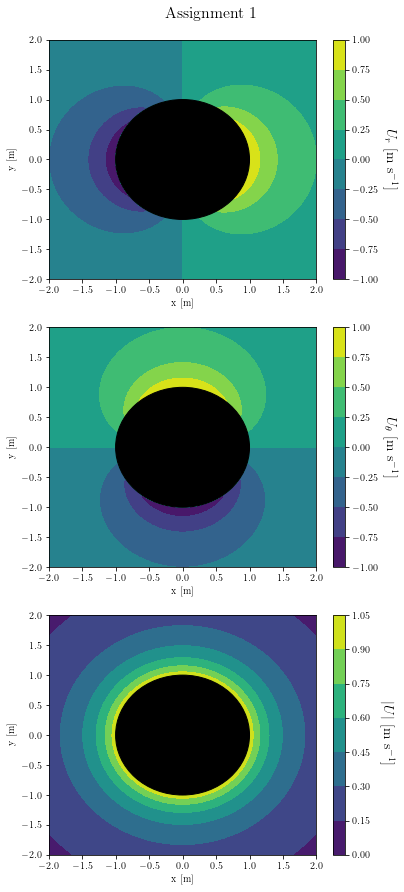

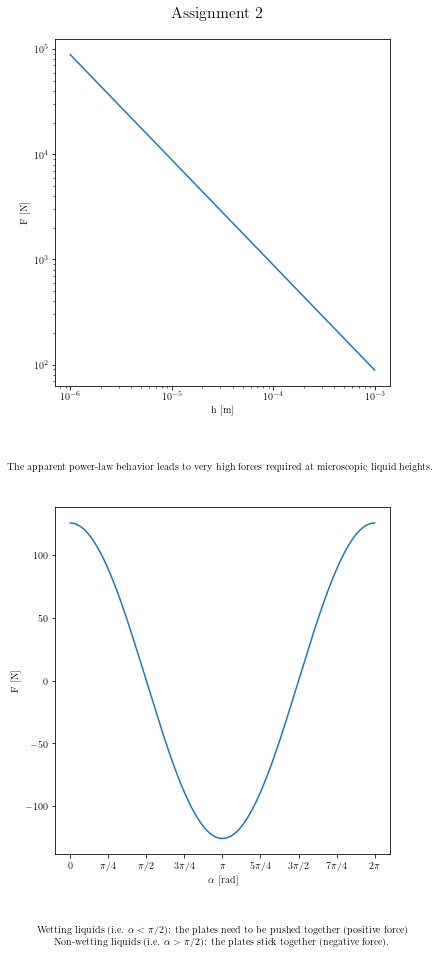

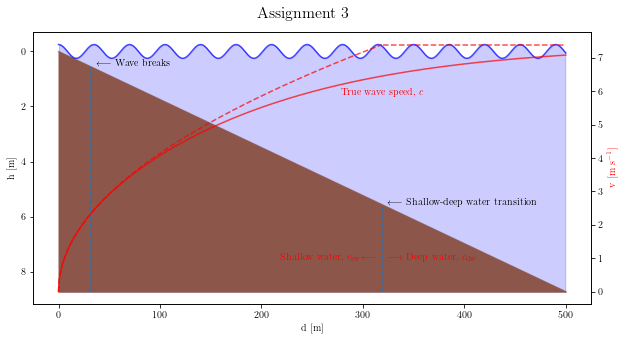

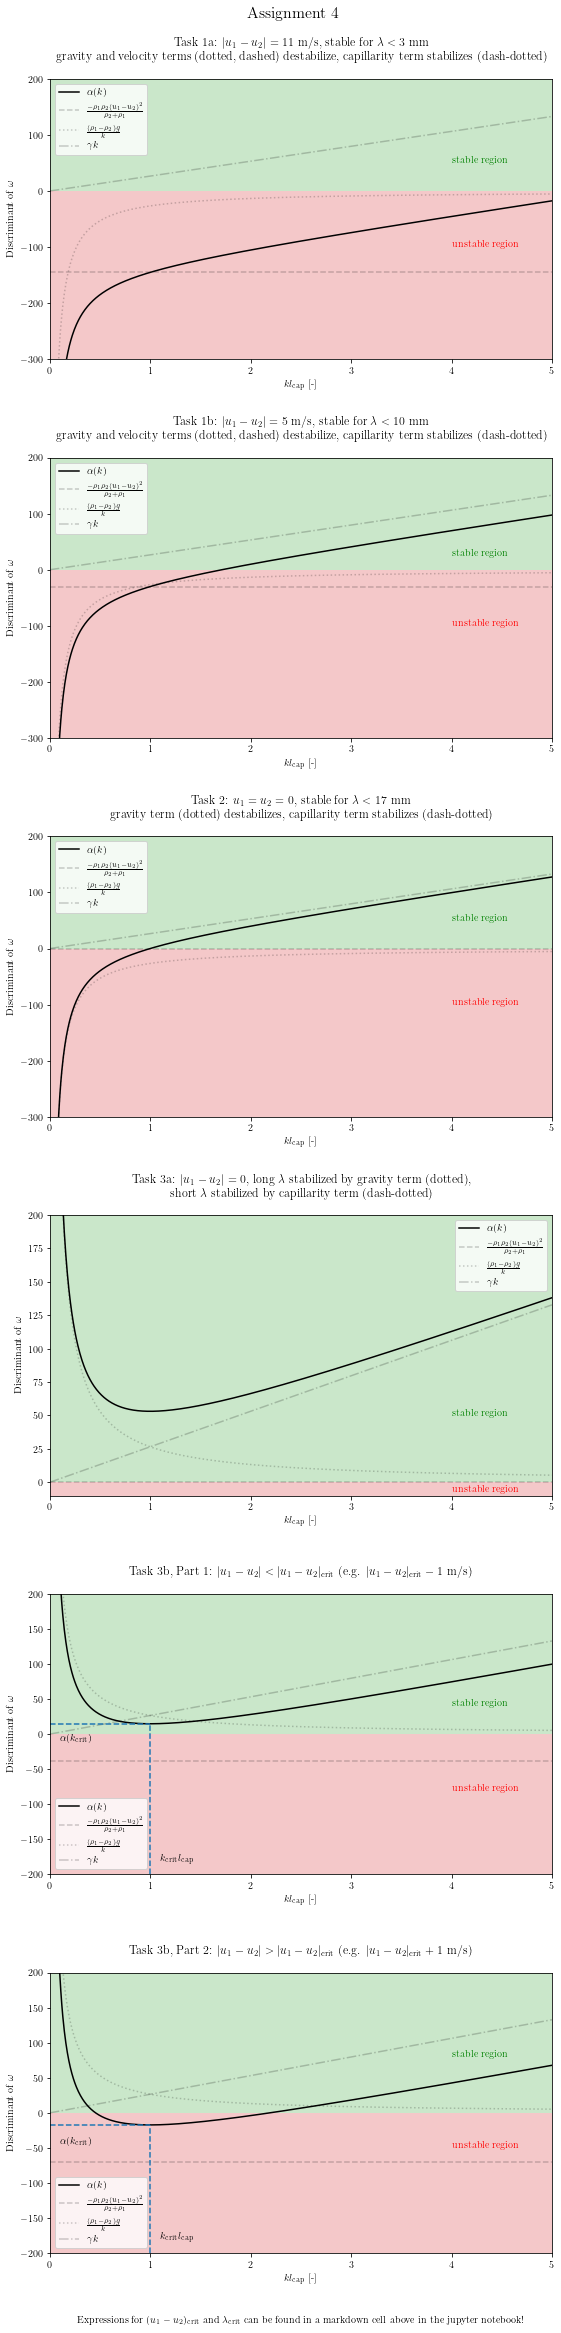

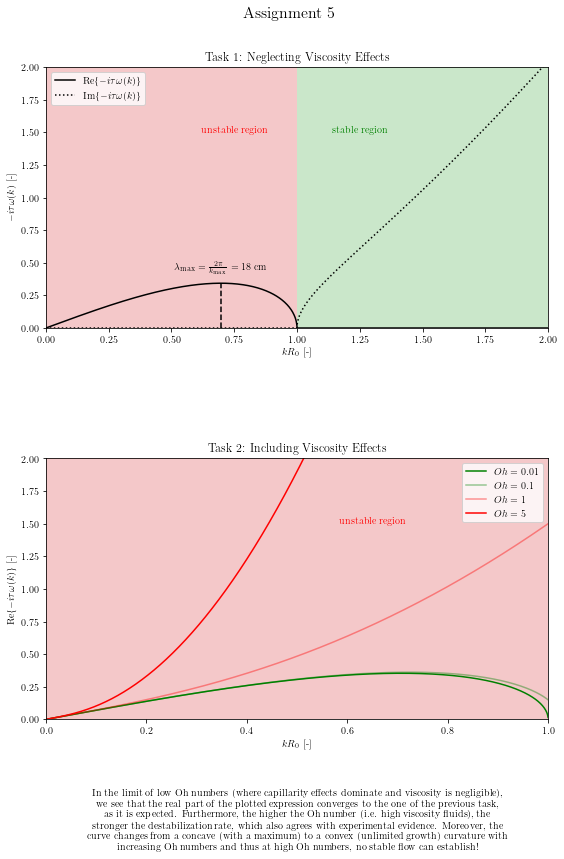

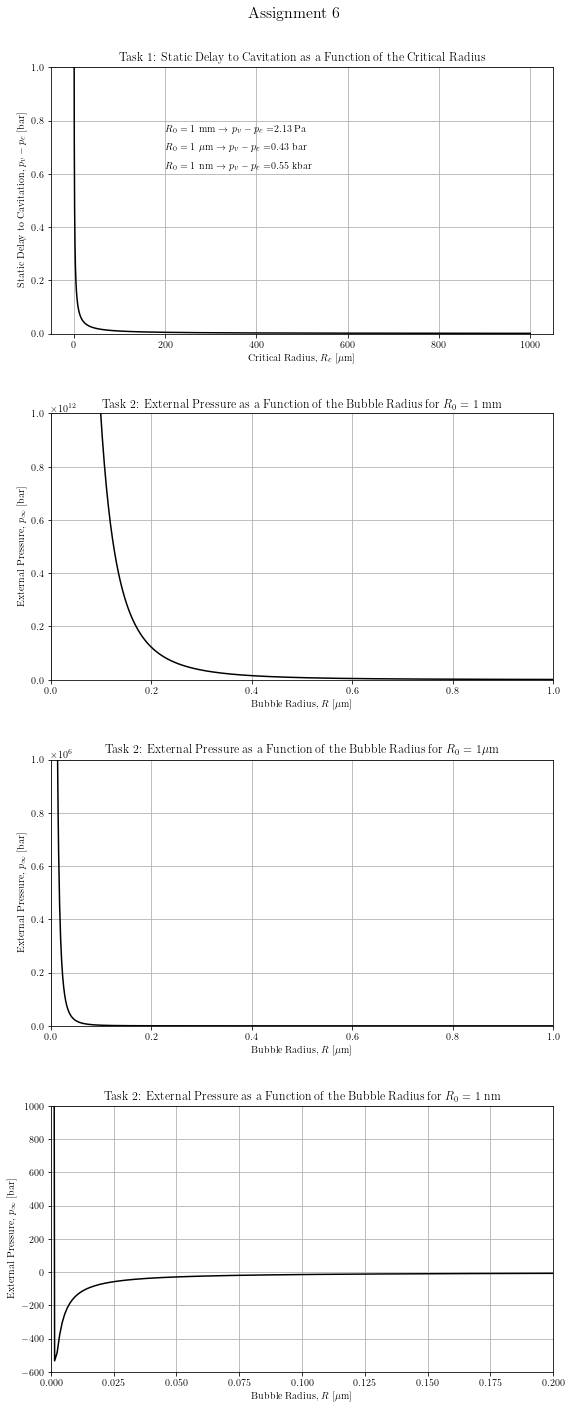

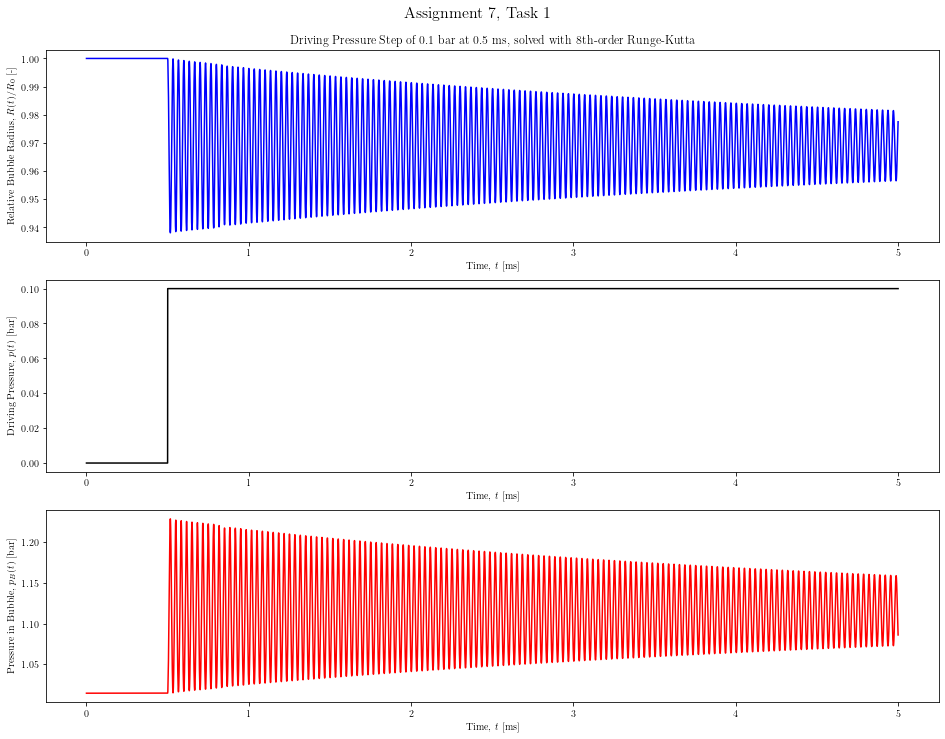

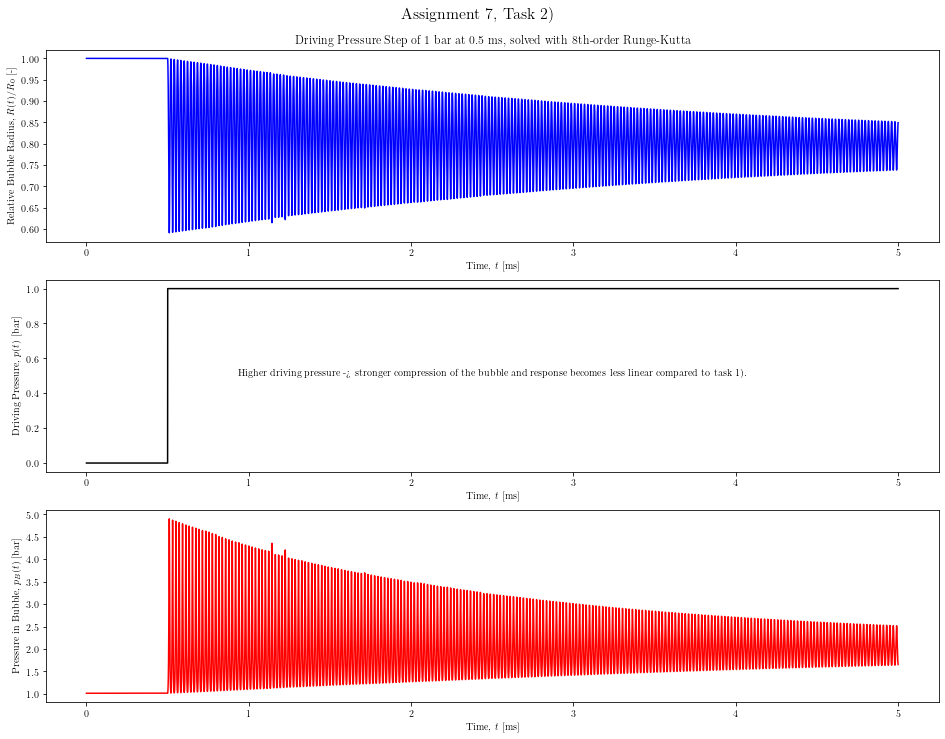

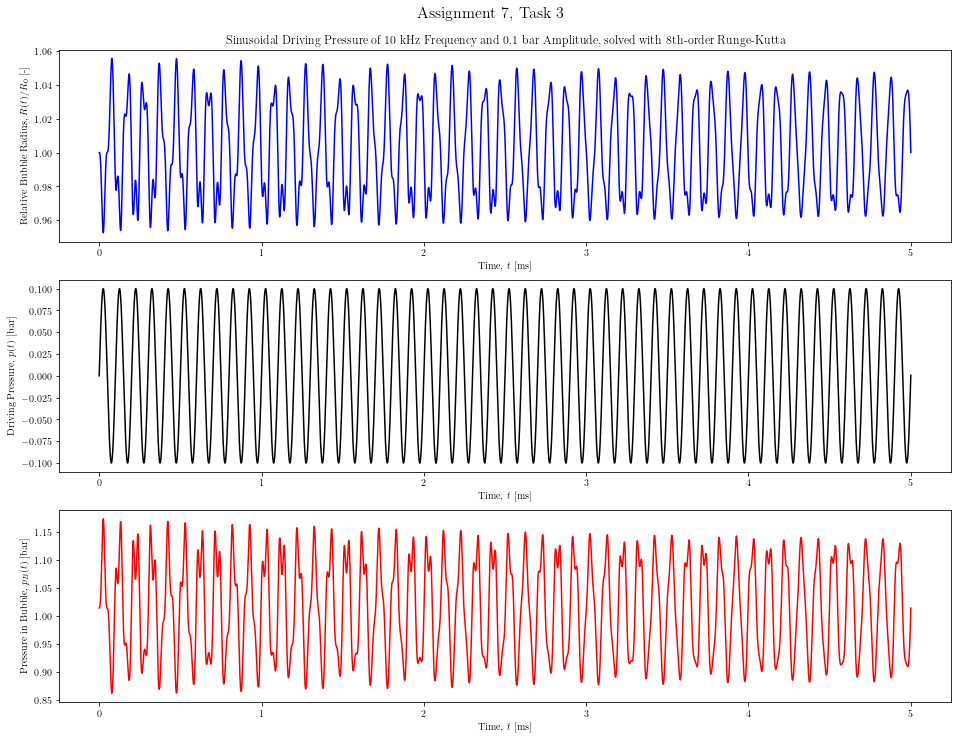

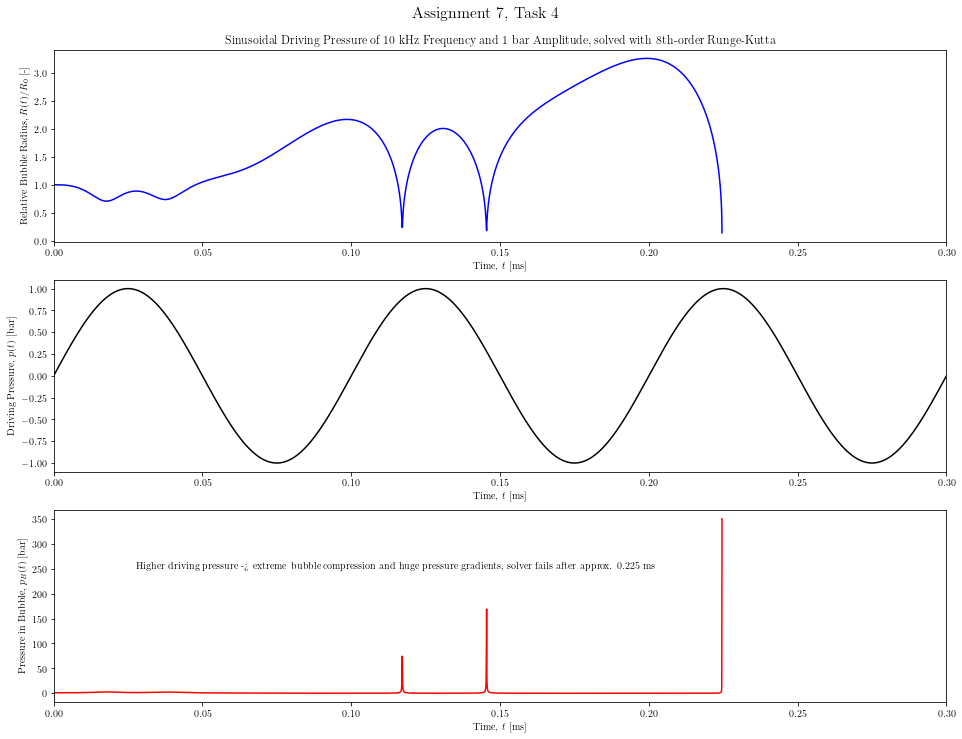

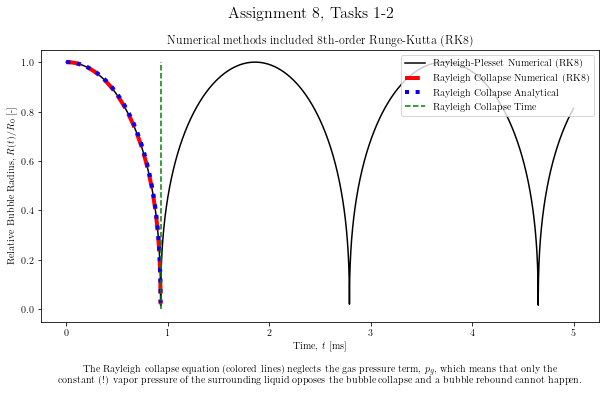

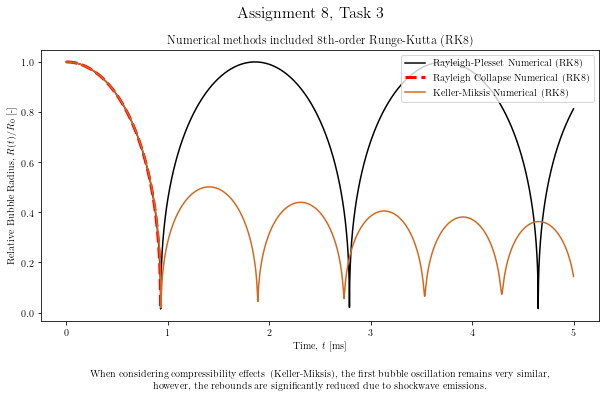

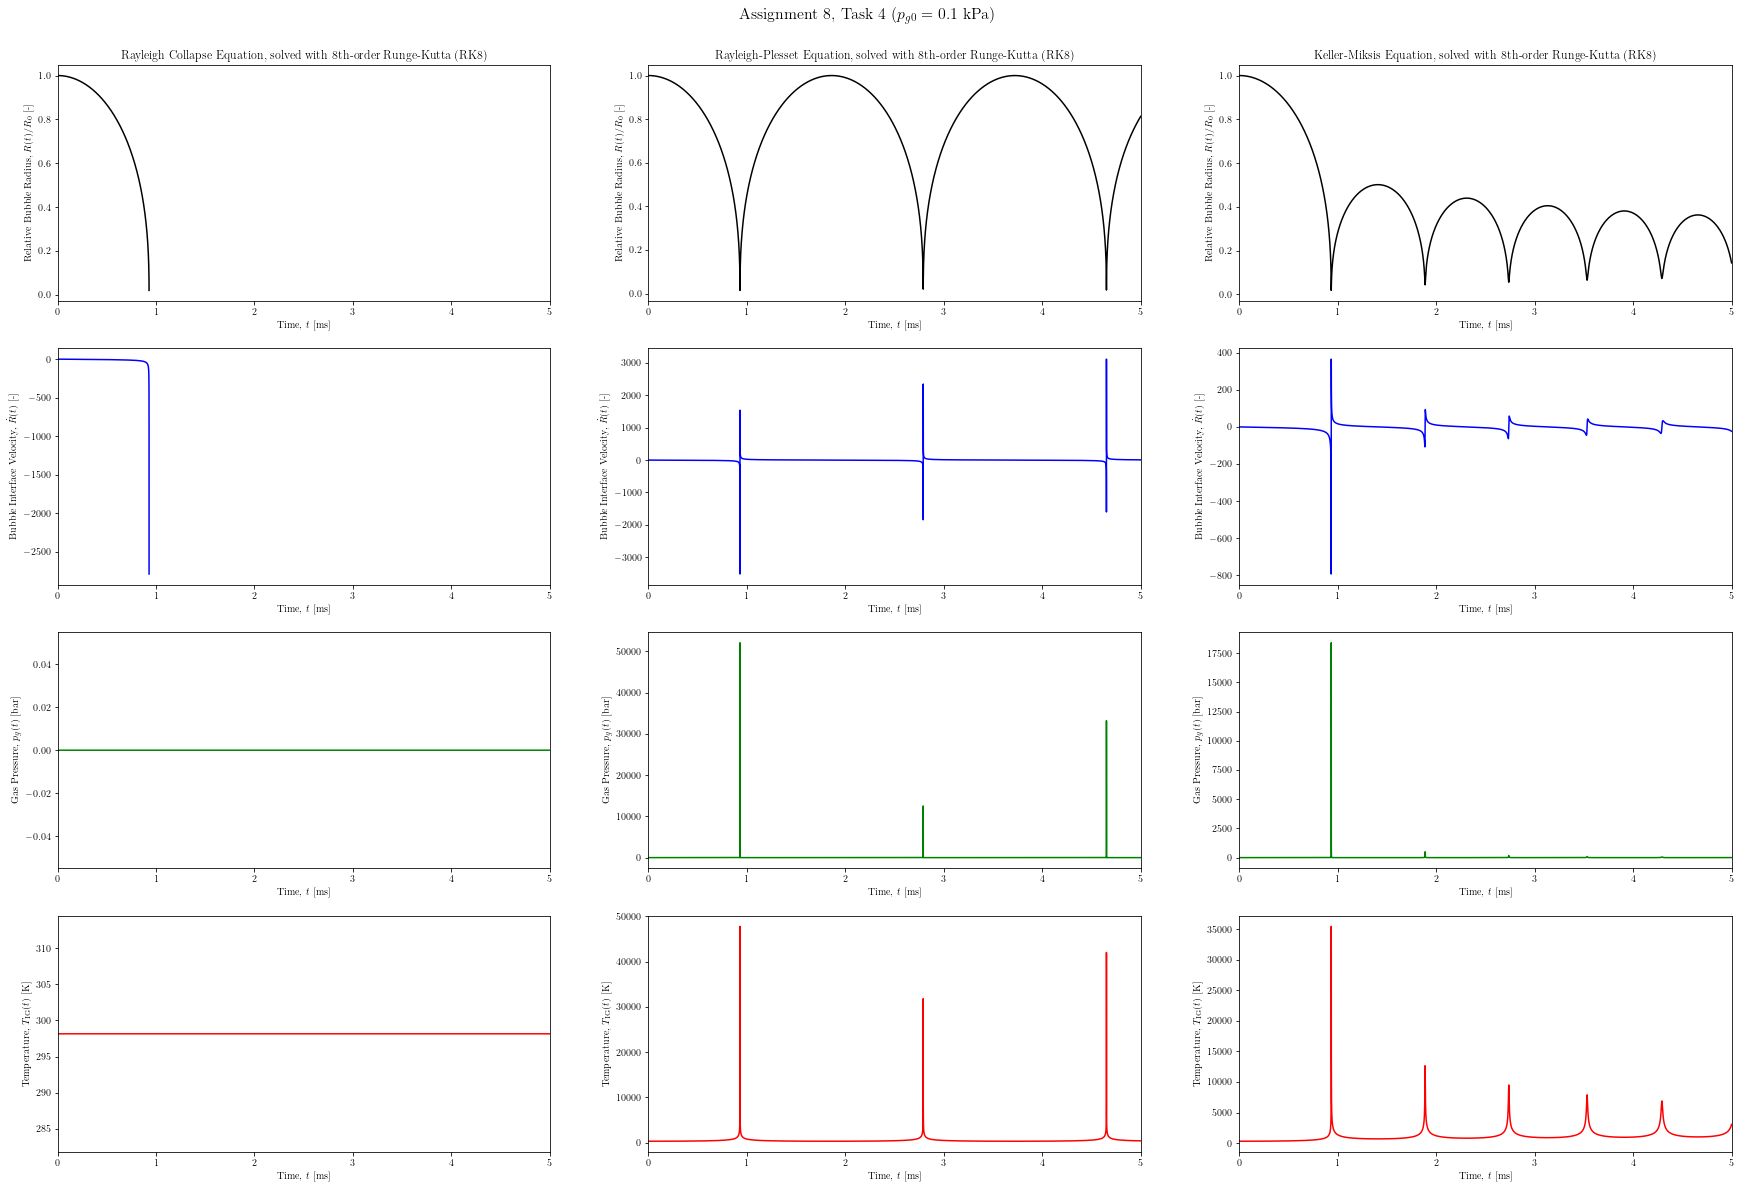

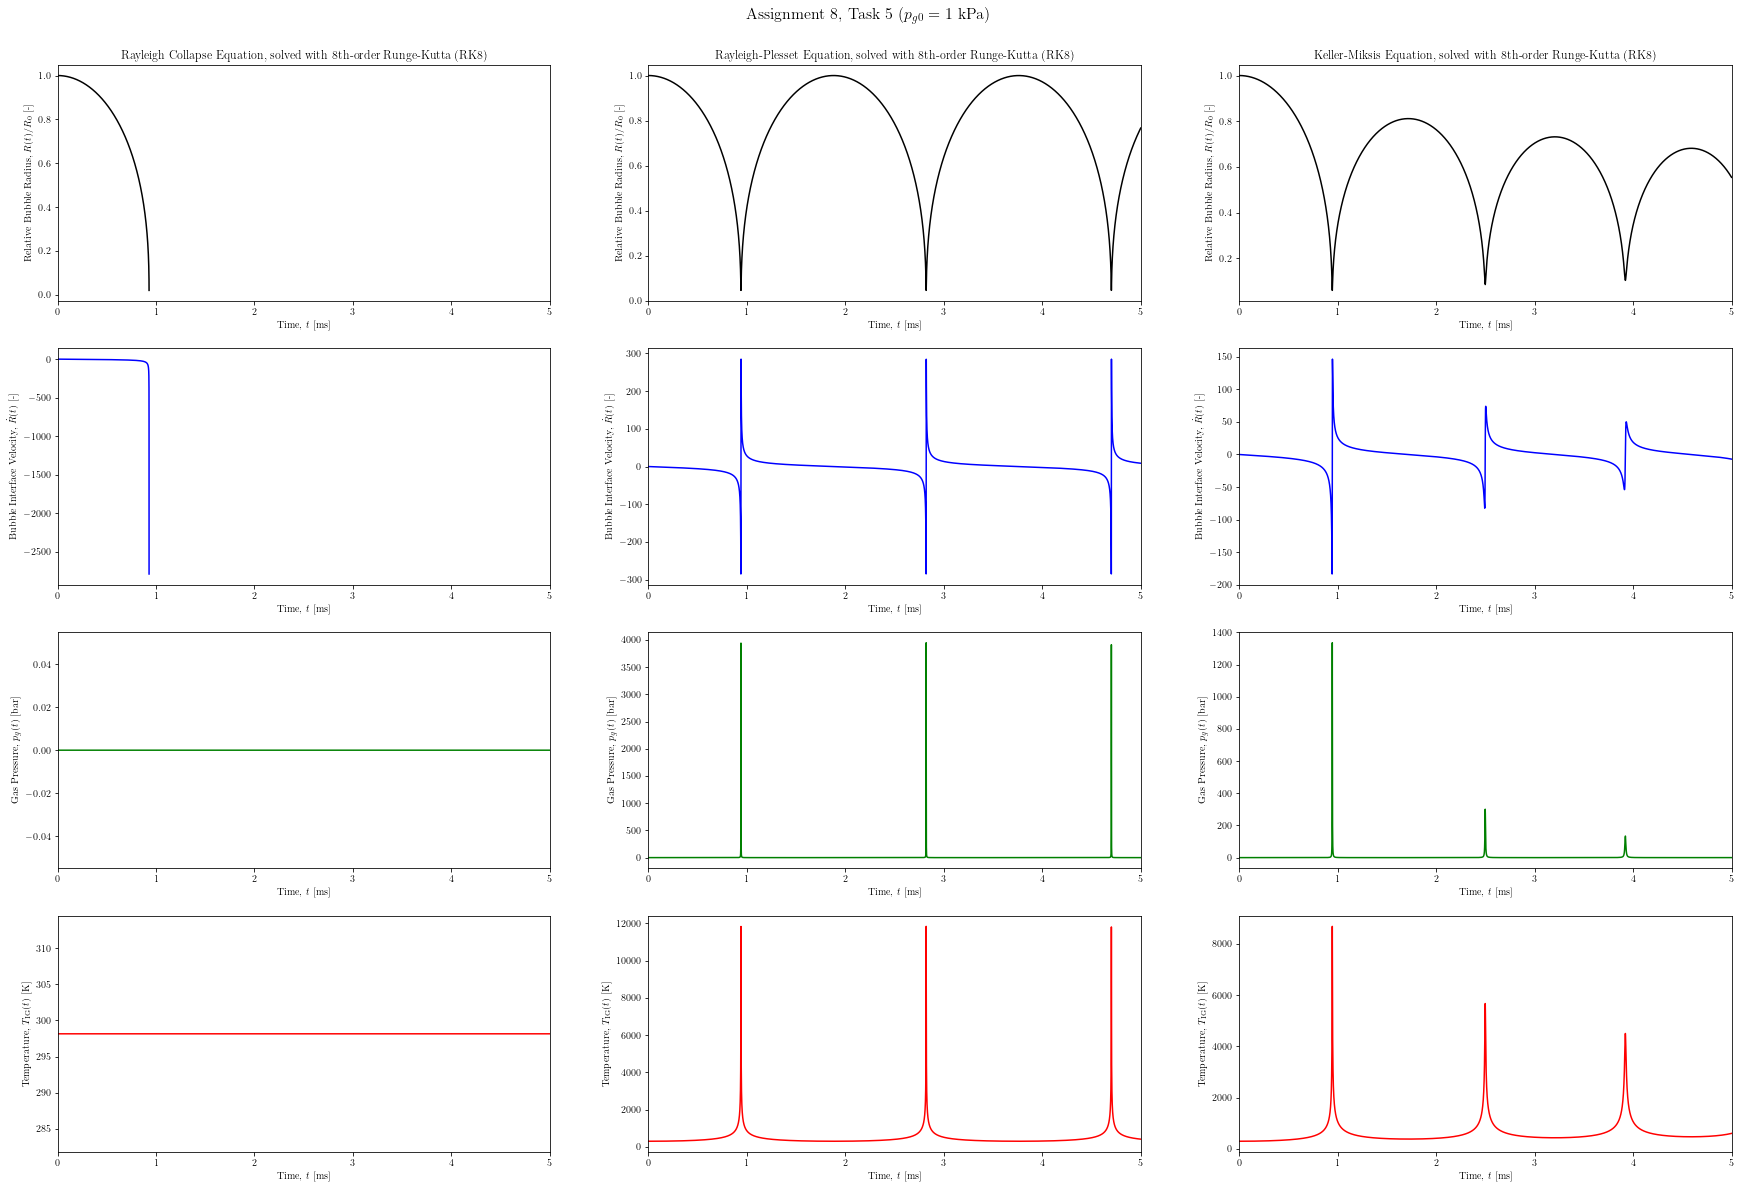

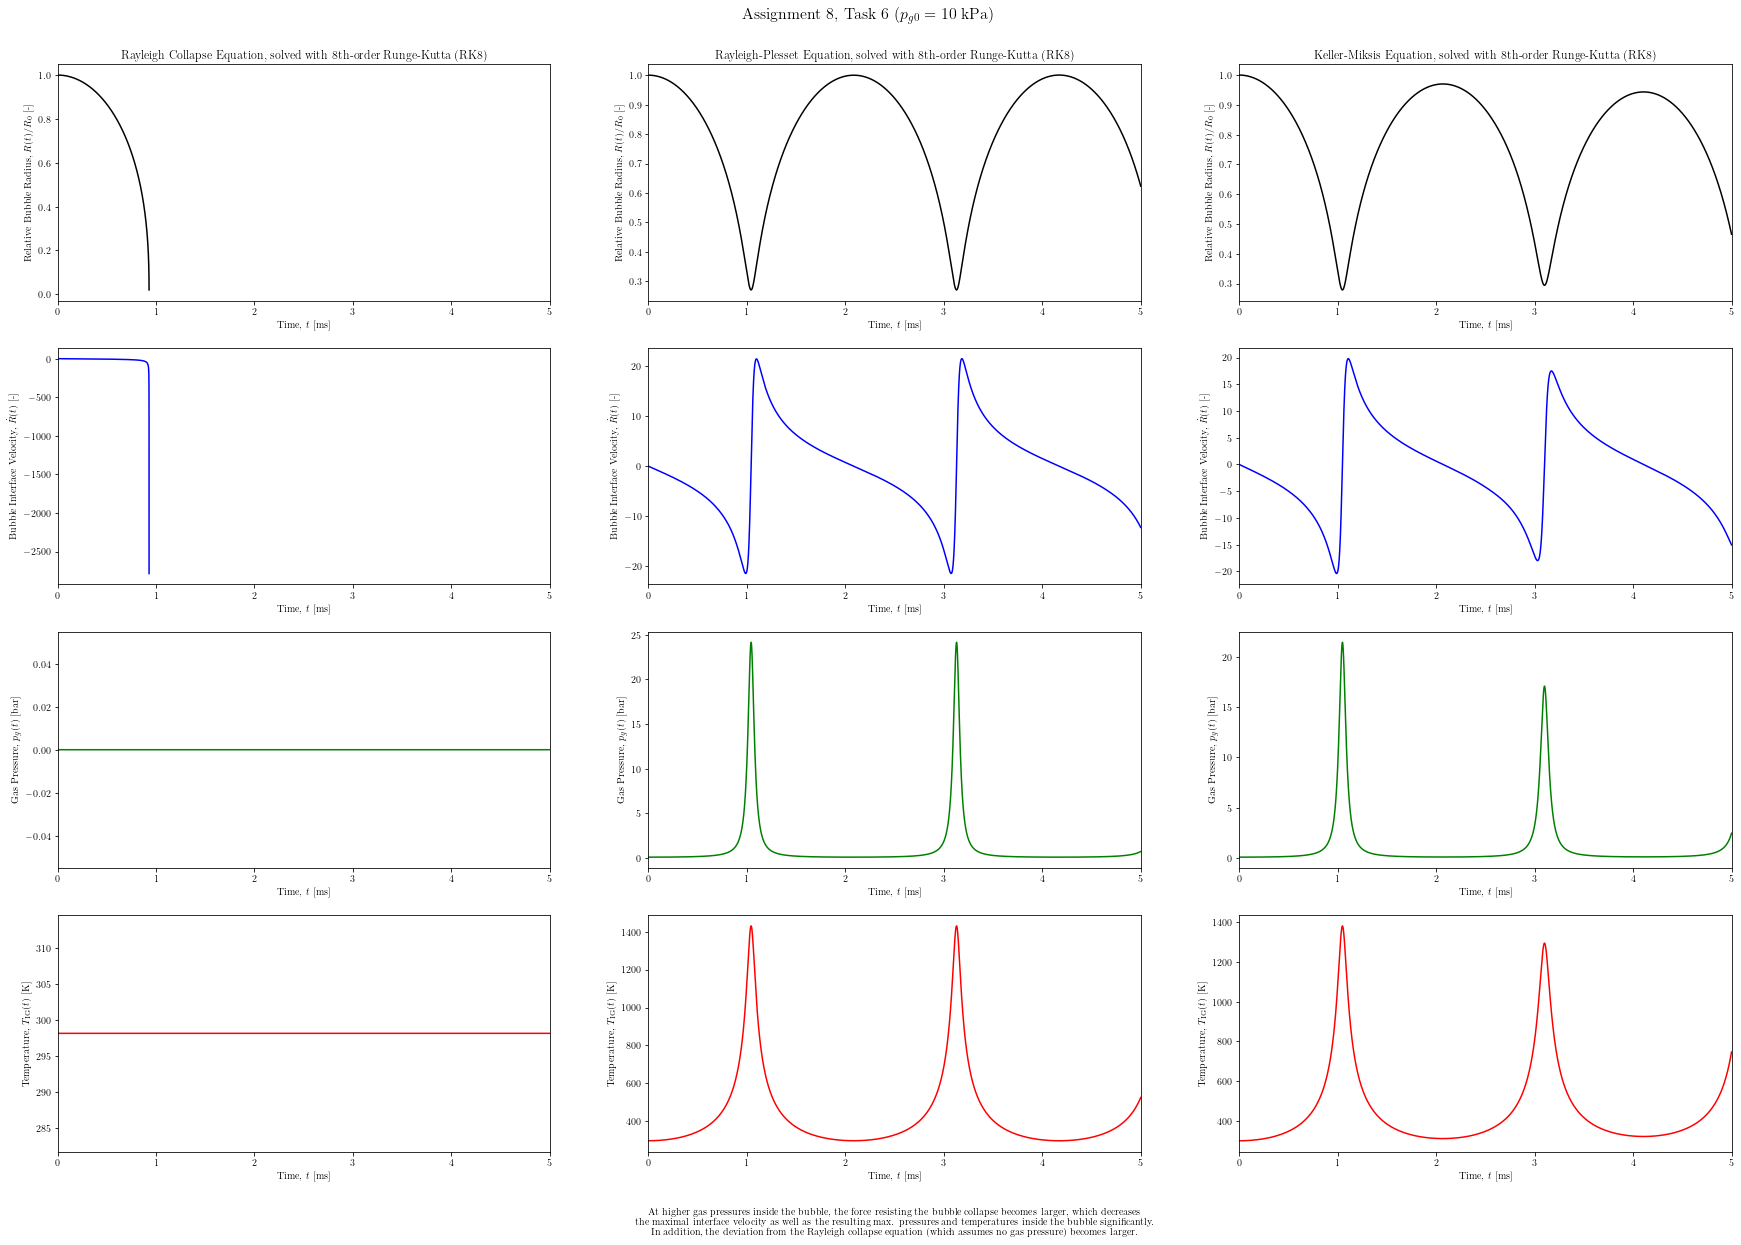

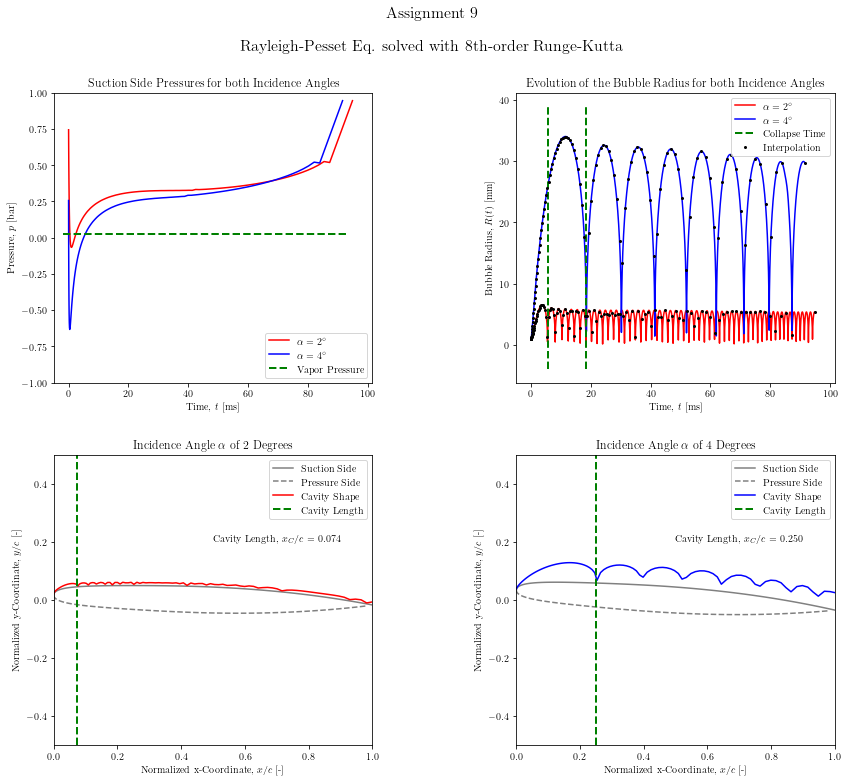

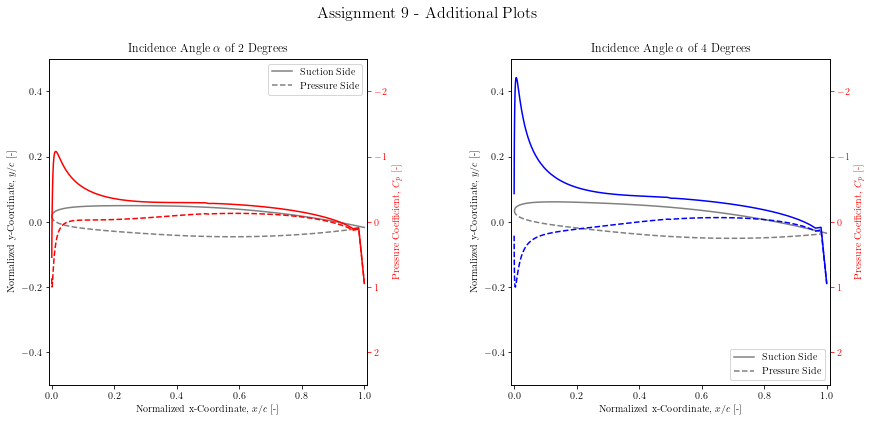

In [37]:
# Call main function
main() 